In [1]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use("seaborn-colorblind")

## Matching over Huang (initial cost)

In [2]:
data_dir = "../data/edo/data/matching_over_huang_initial_cost/"

dfs = []
for seed in range(5):
    df = pd.read_csv(f"{data_dir}{seed}/summary/main.csv")
    df["seed"] = seed
    dfs.append(df)
    
main = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
def violinplots(main, column):

    num_gens, size, seeds = main[["generation", "individual", "seed"]].nunique()
    desired = range(0, num_gens, num_gens // 20)
    flierprops = dict(marker=".", markersize=2.5, linestyle="none")

    for seed, data in main.groupby("seed")[column]:
        fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

        data = data.values.reshape((num_gens, size))
        ax.boxplot(data[desired].T, flierprops=flierprops)

        ax.set_xticklabels(desired)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(column.capitalize())

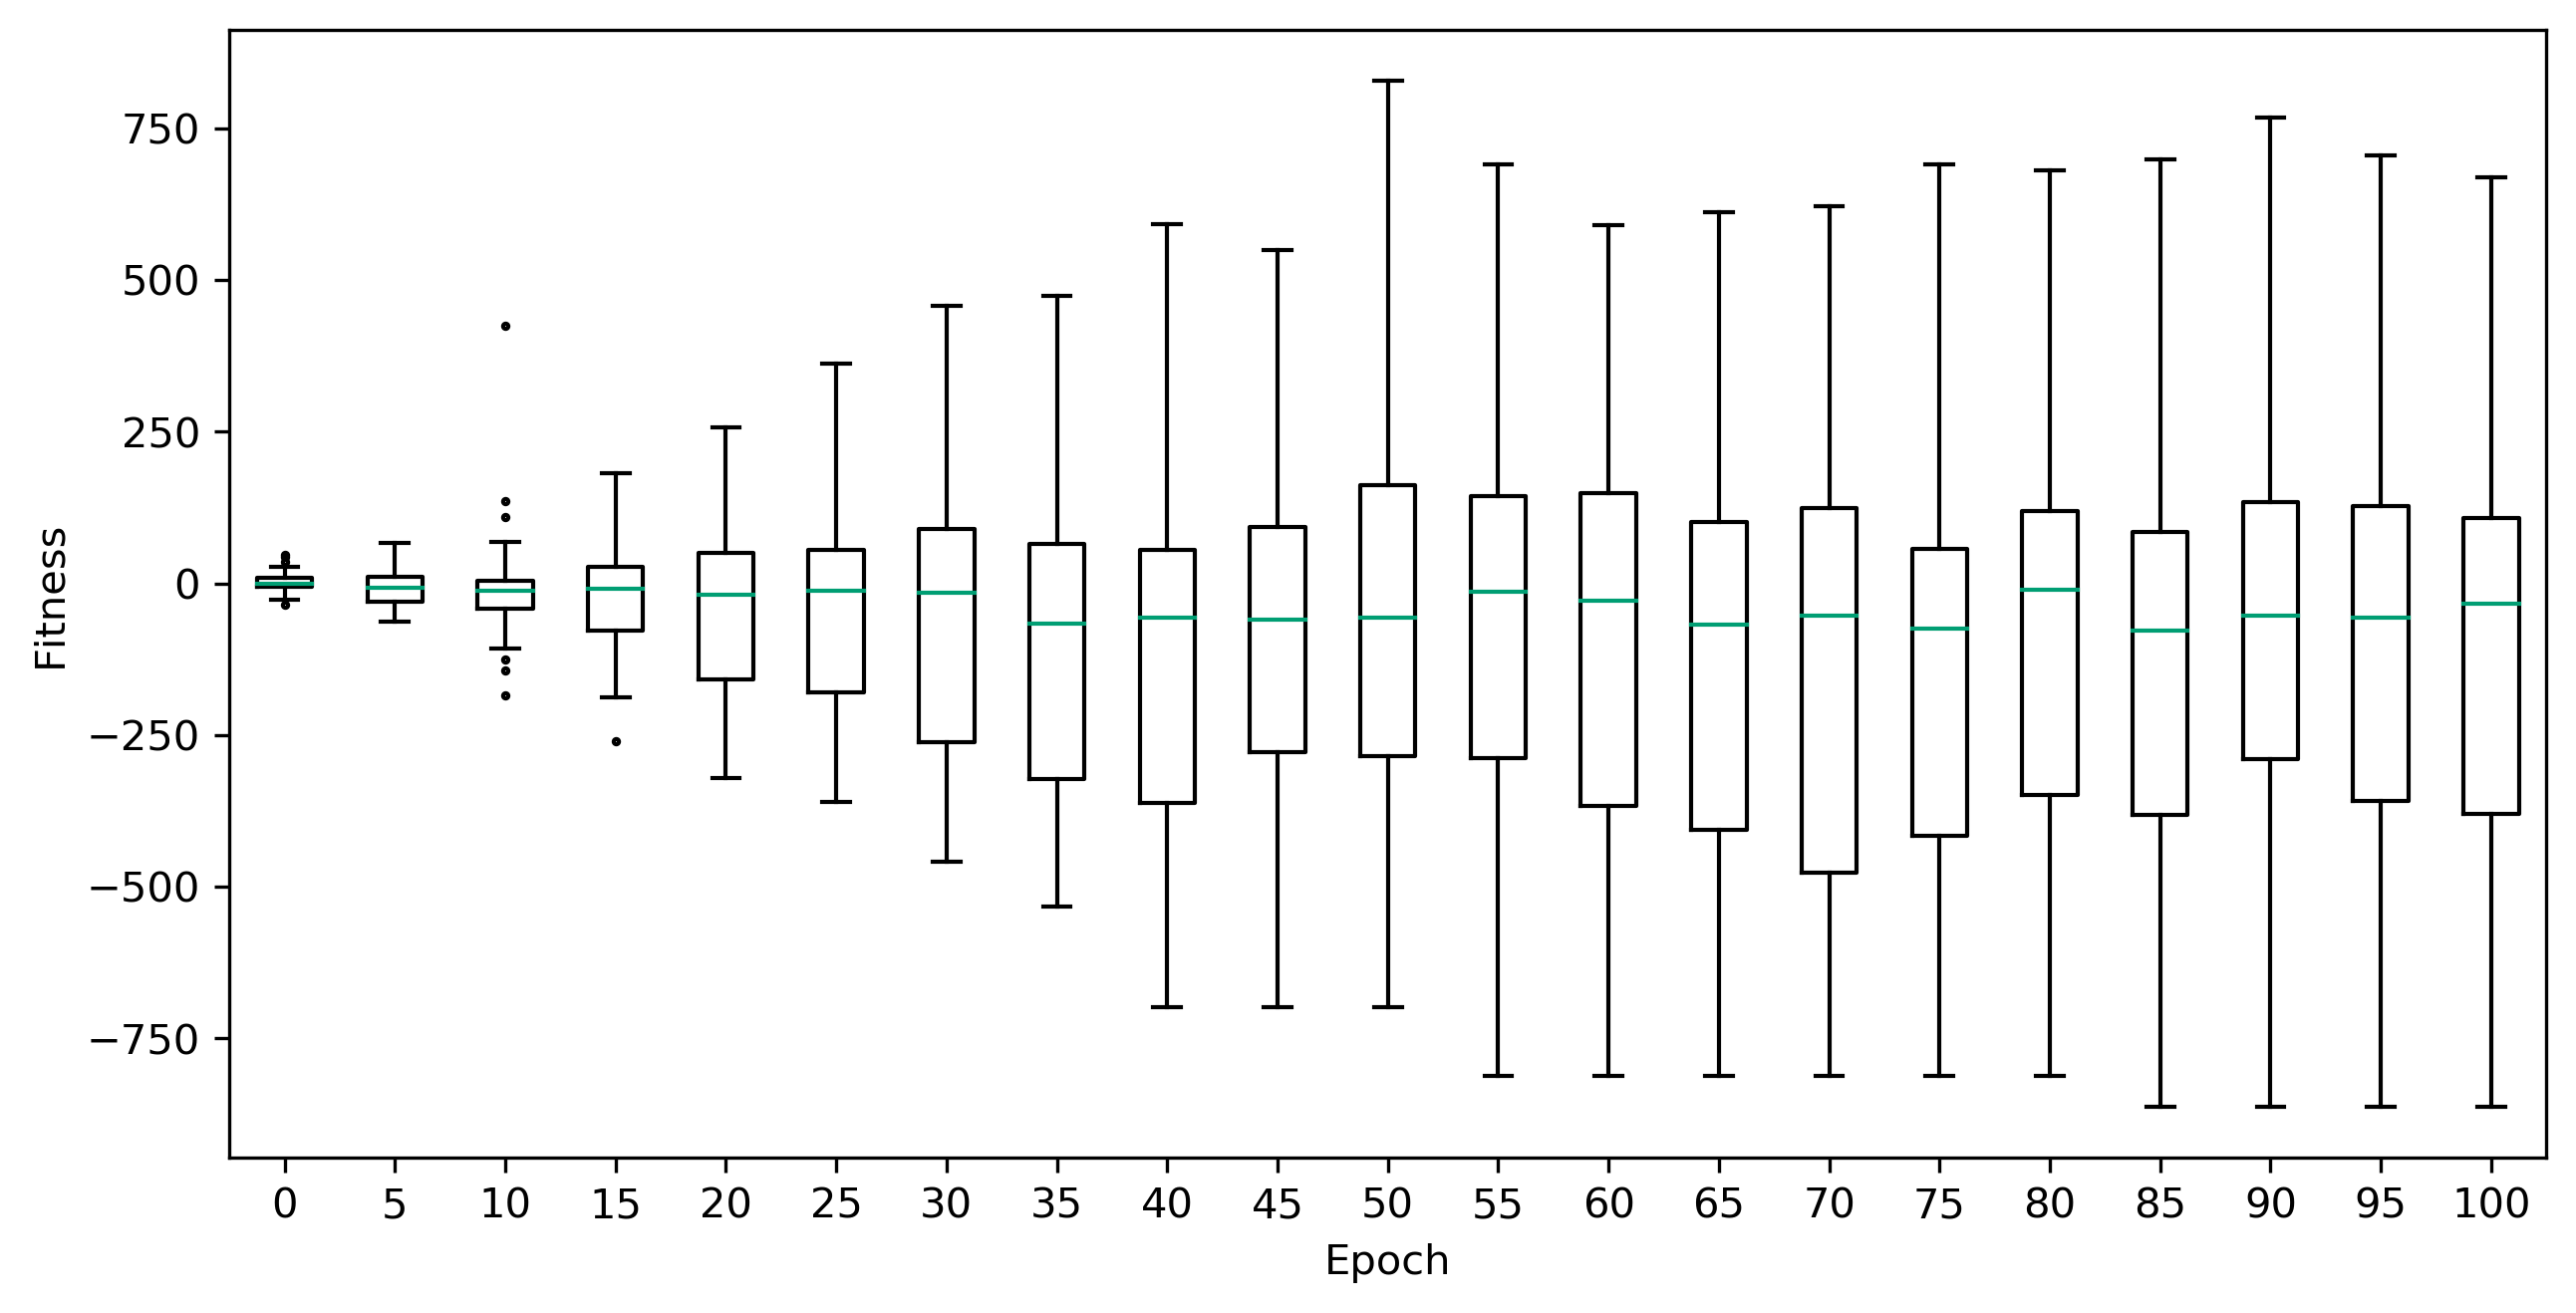

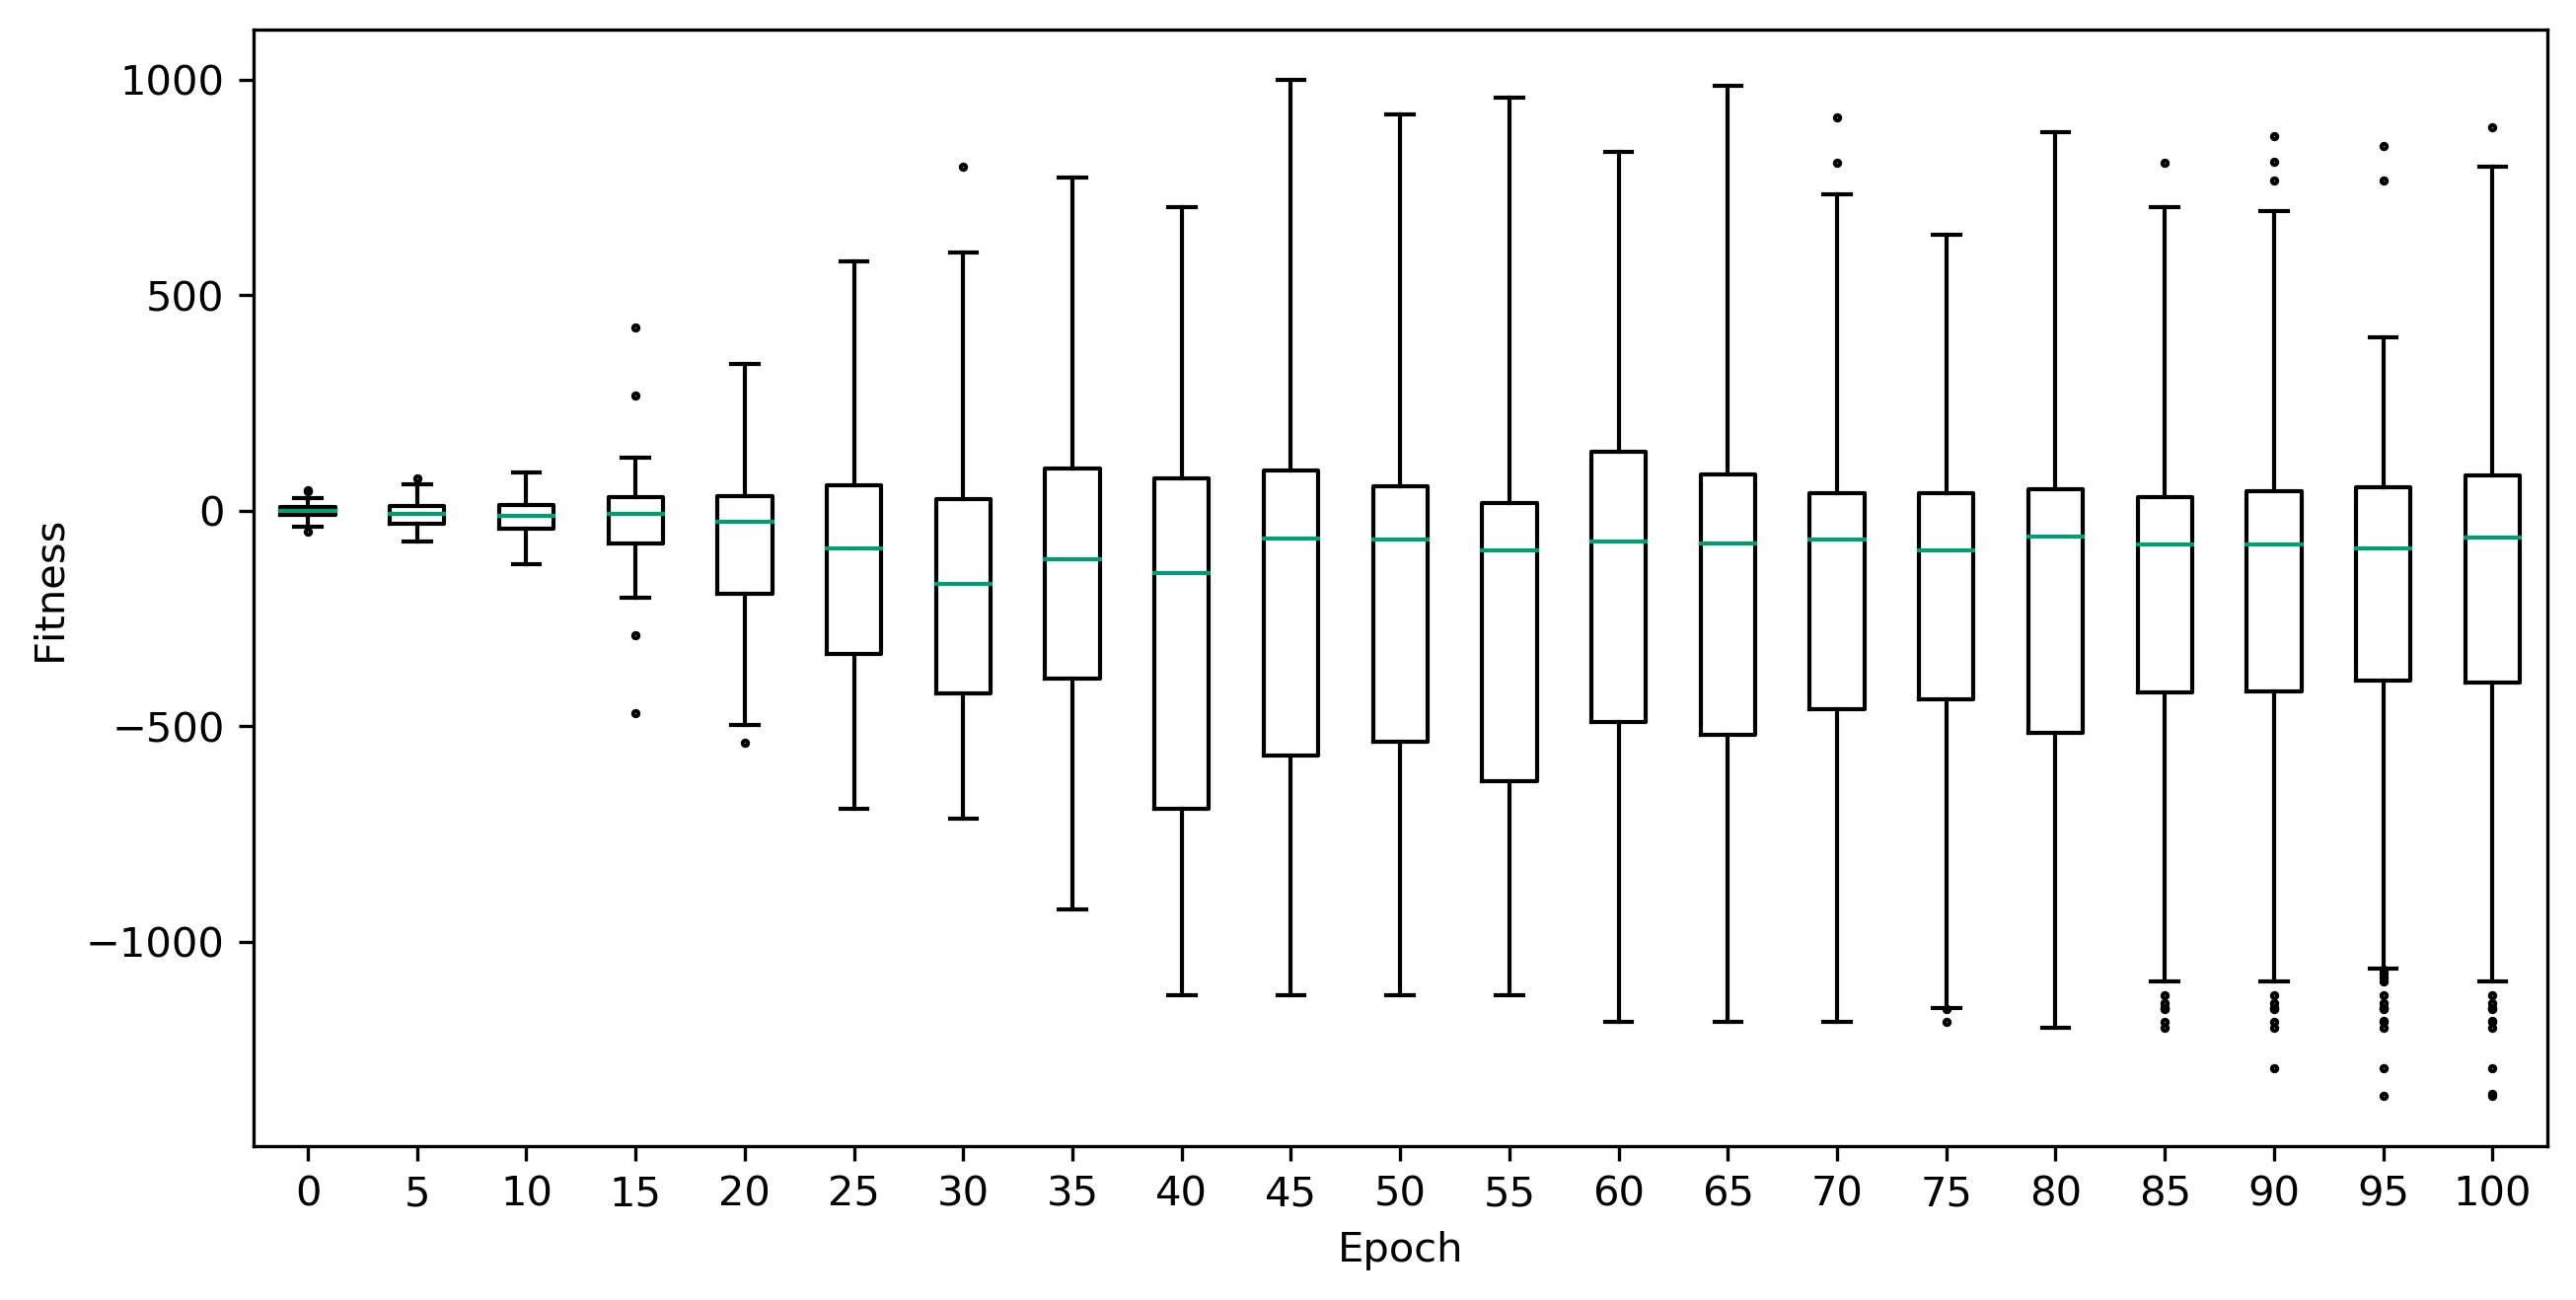

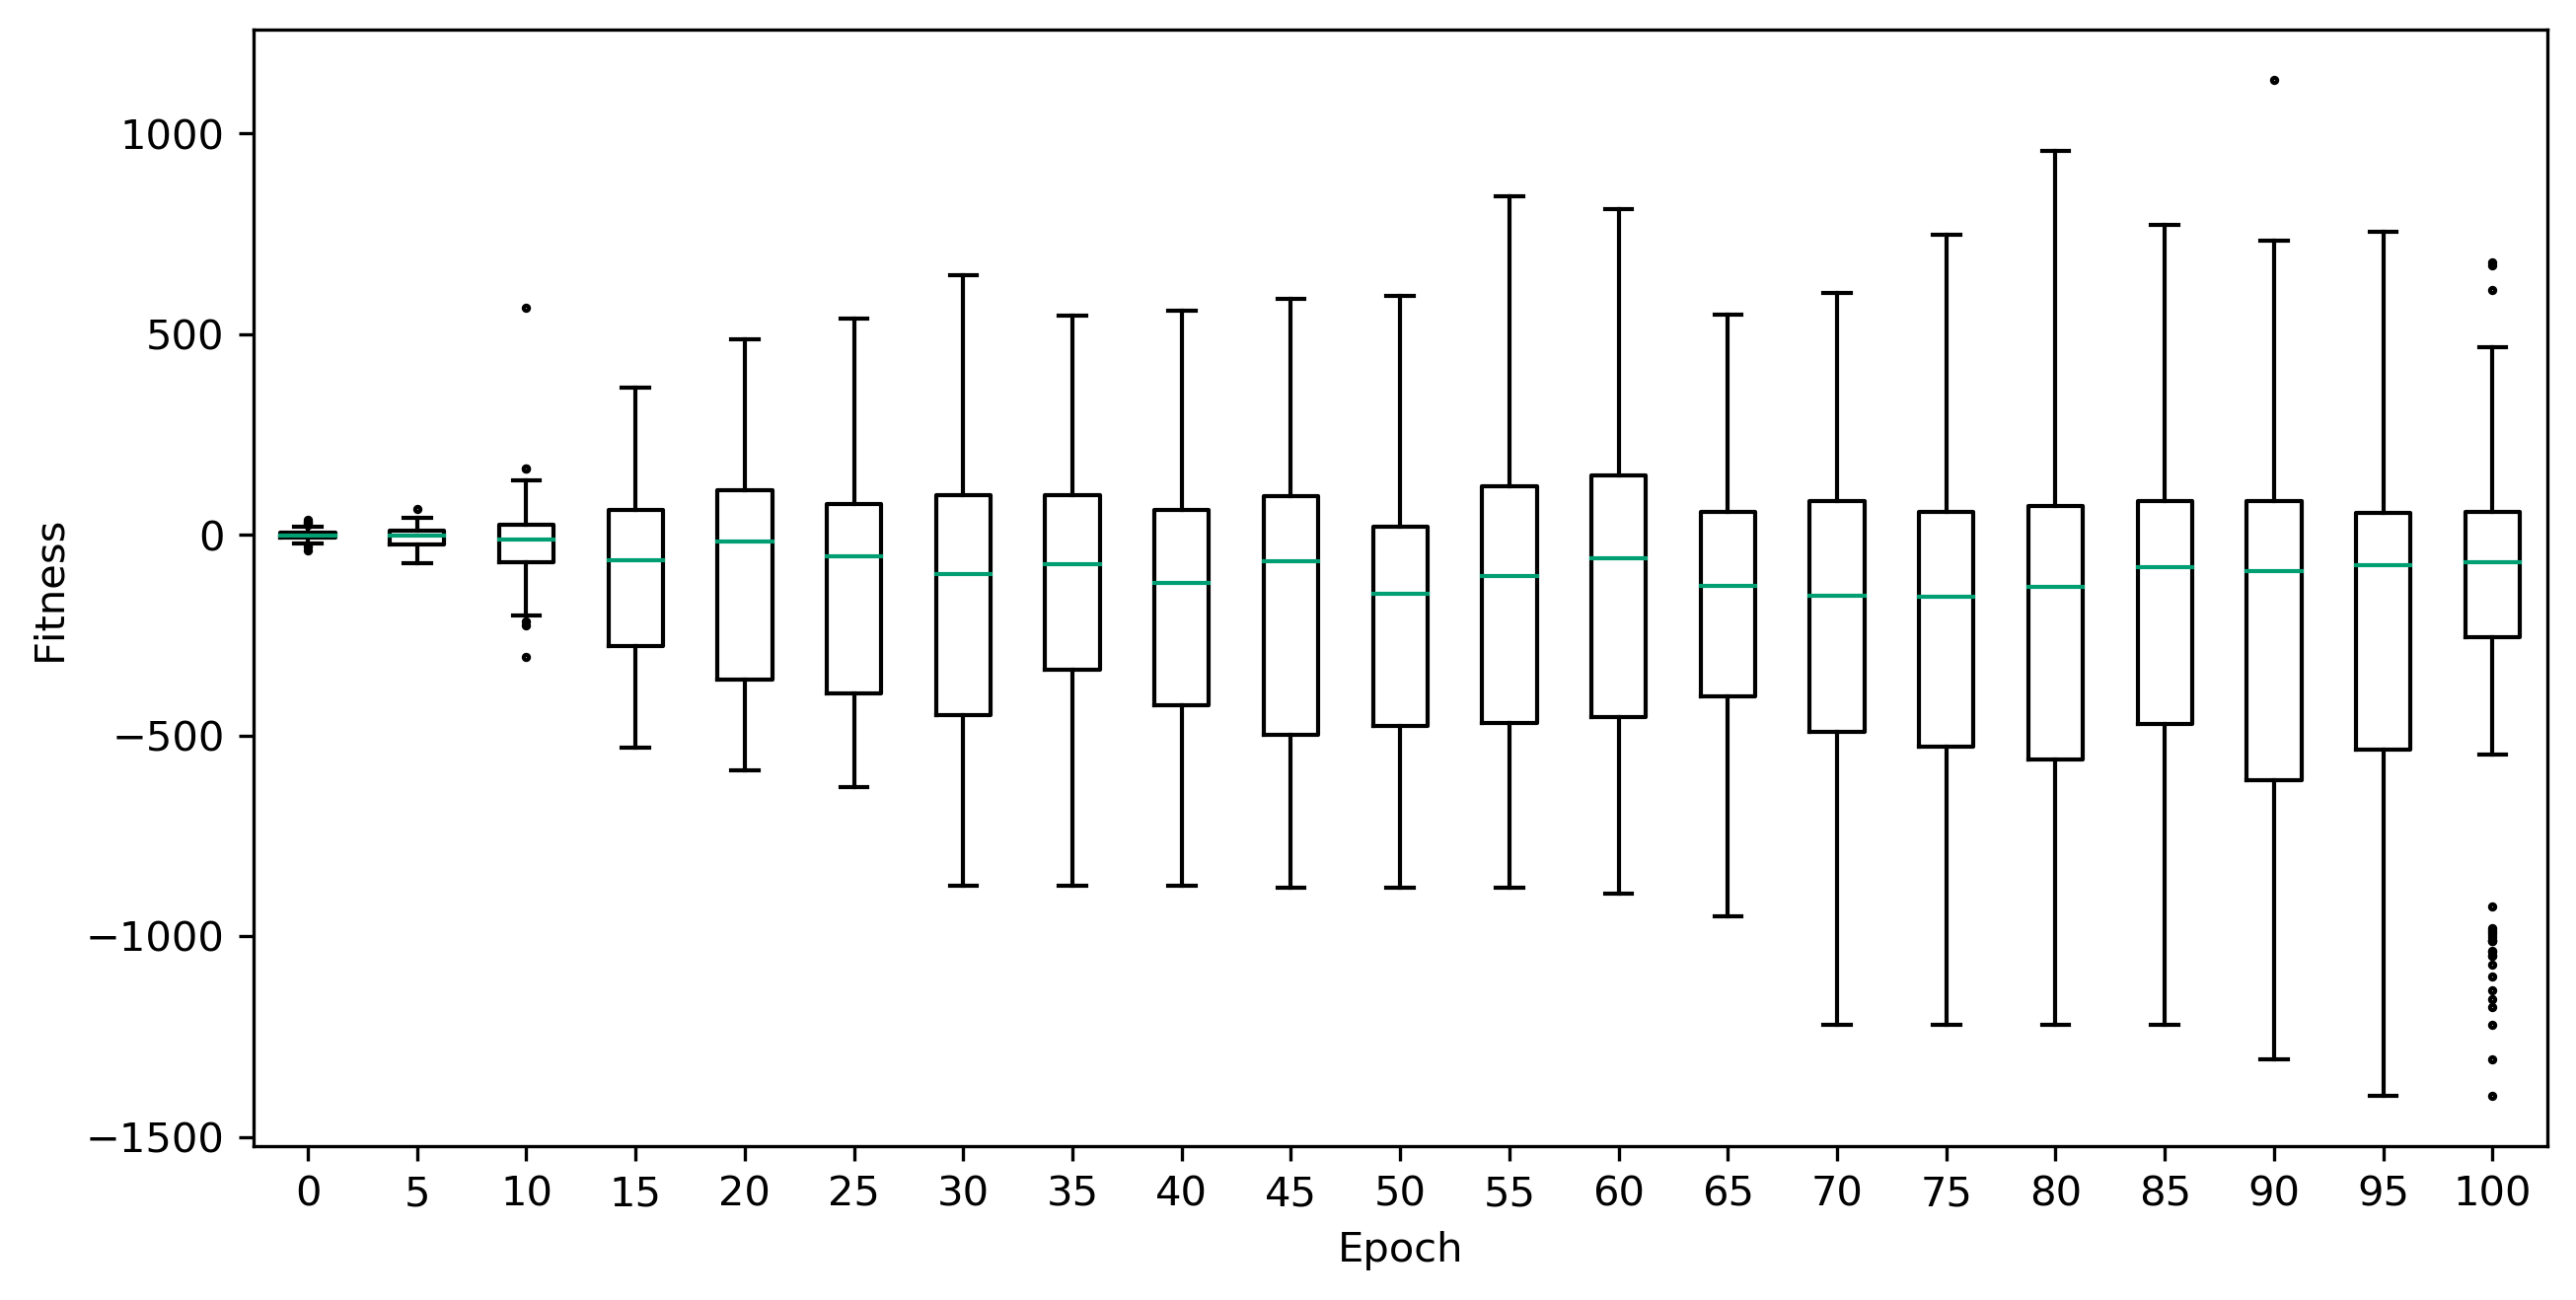

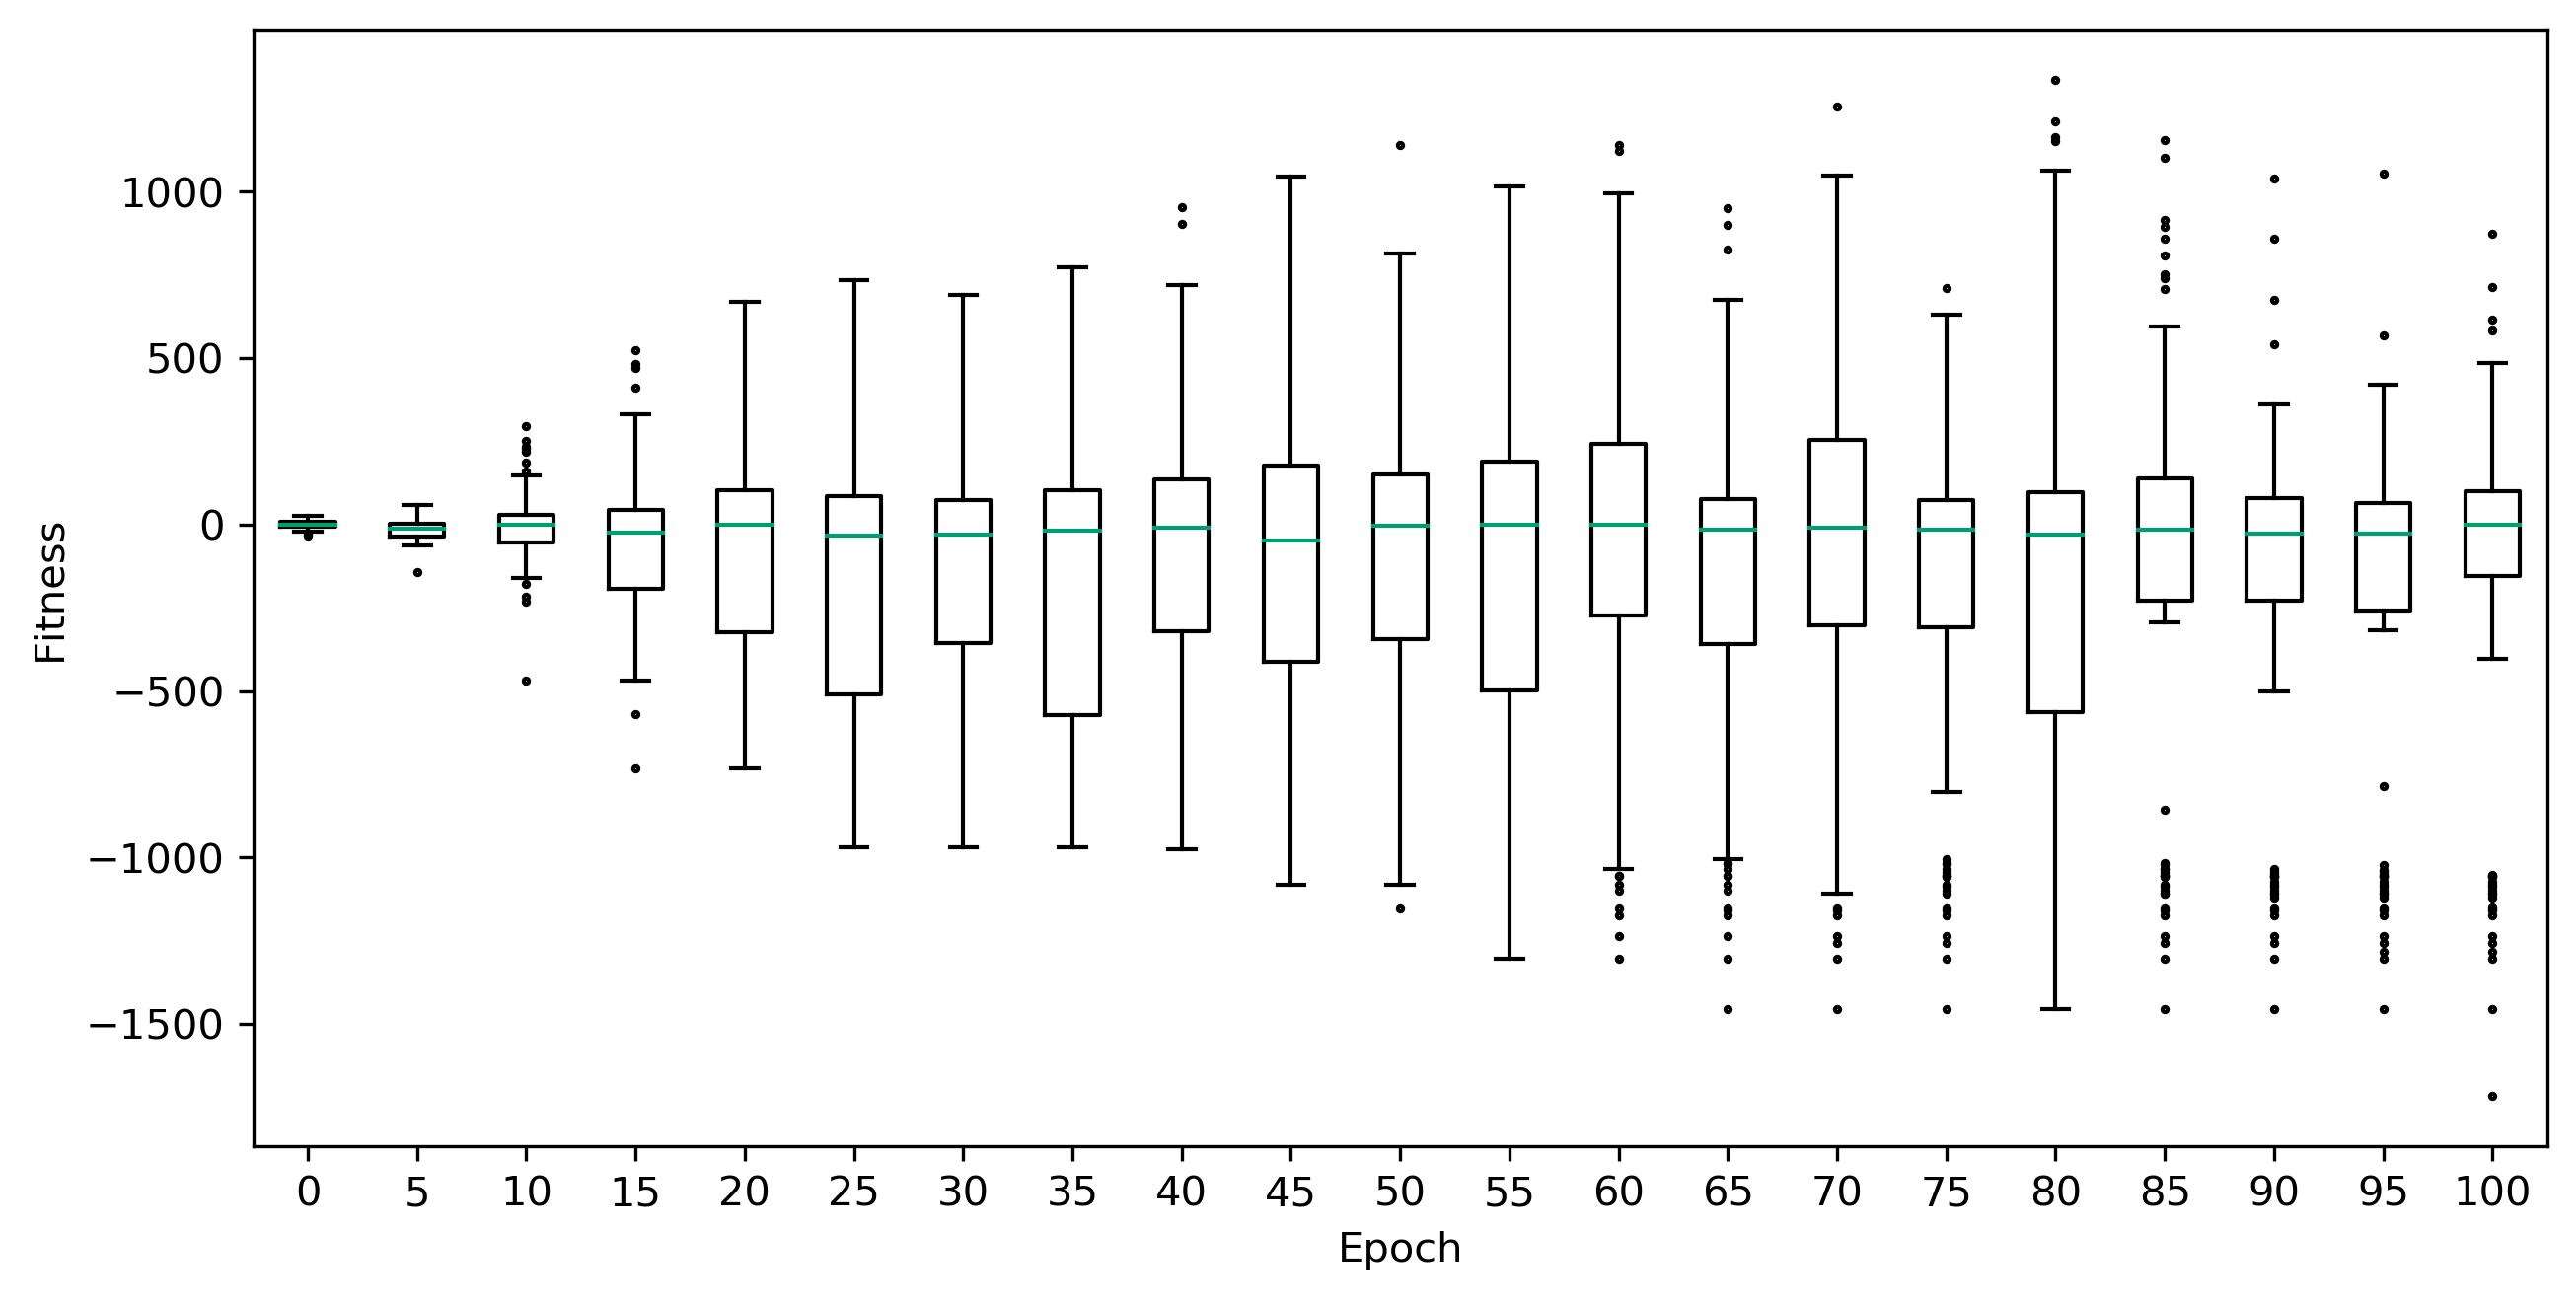

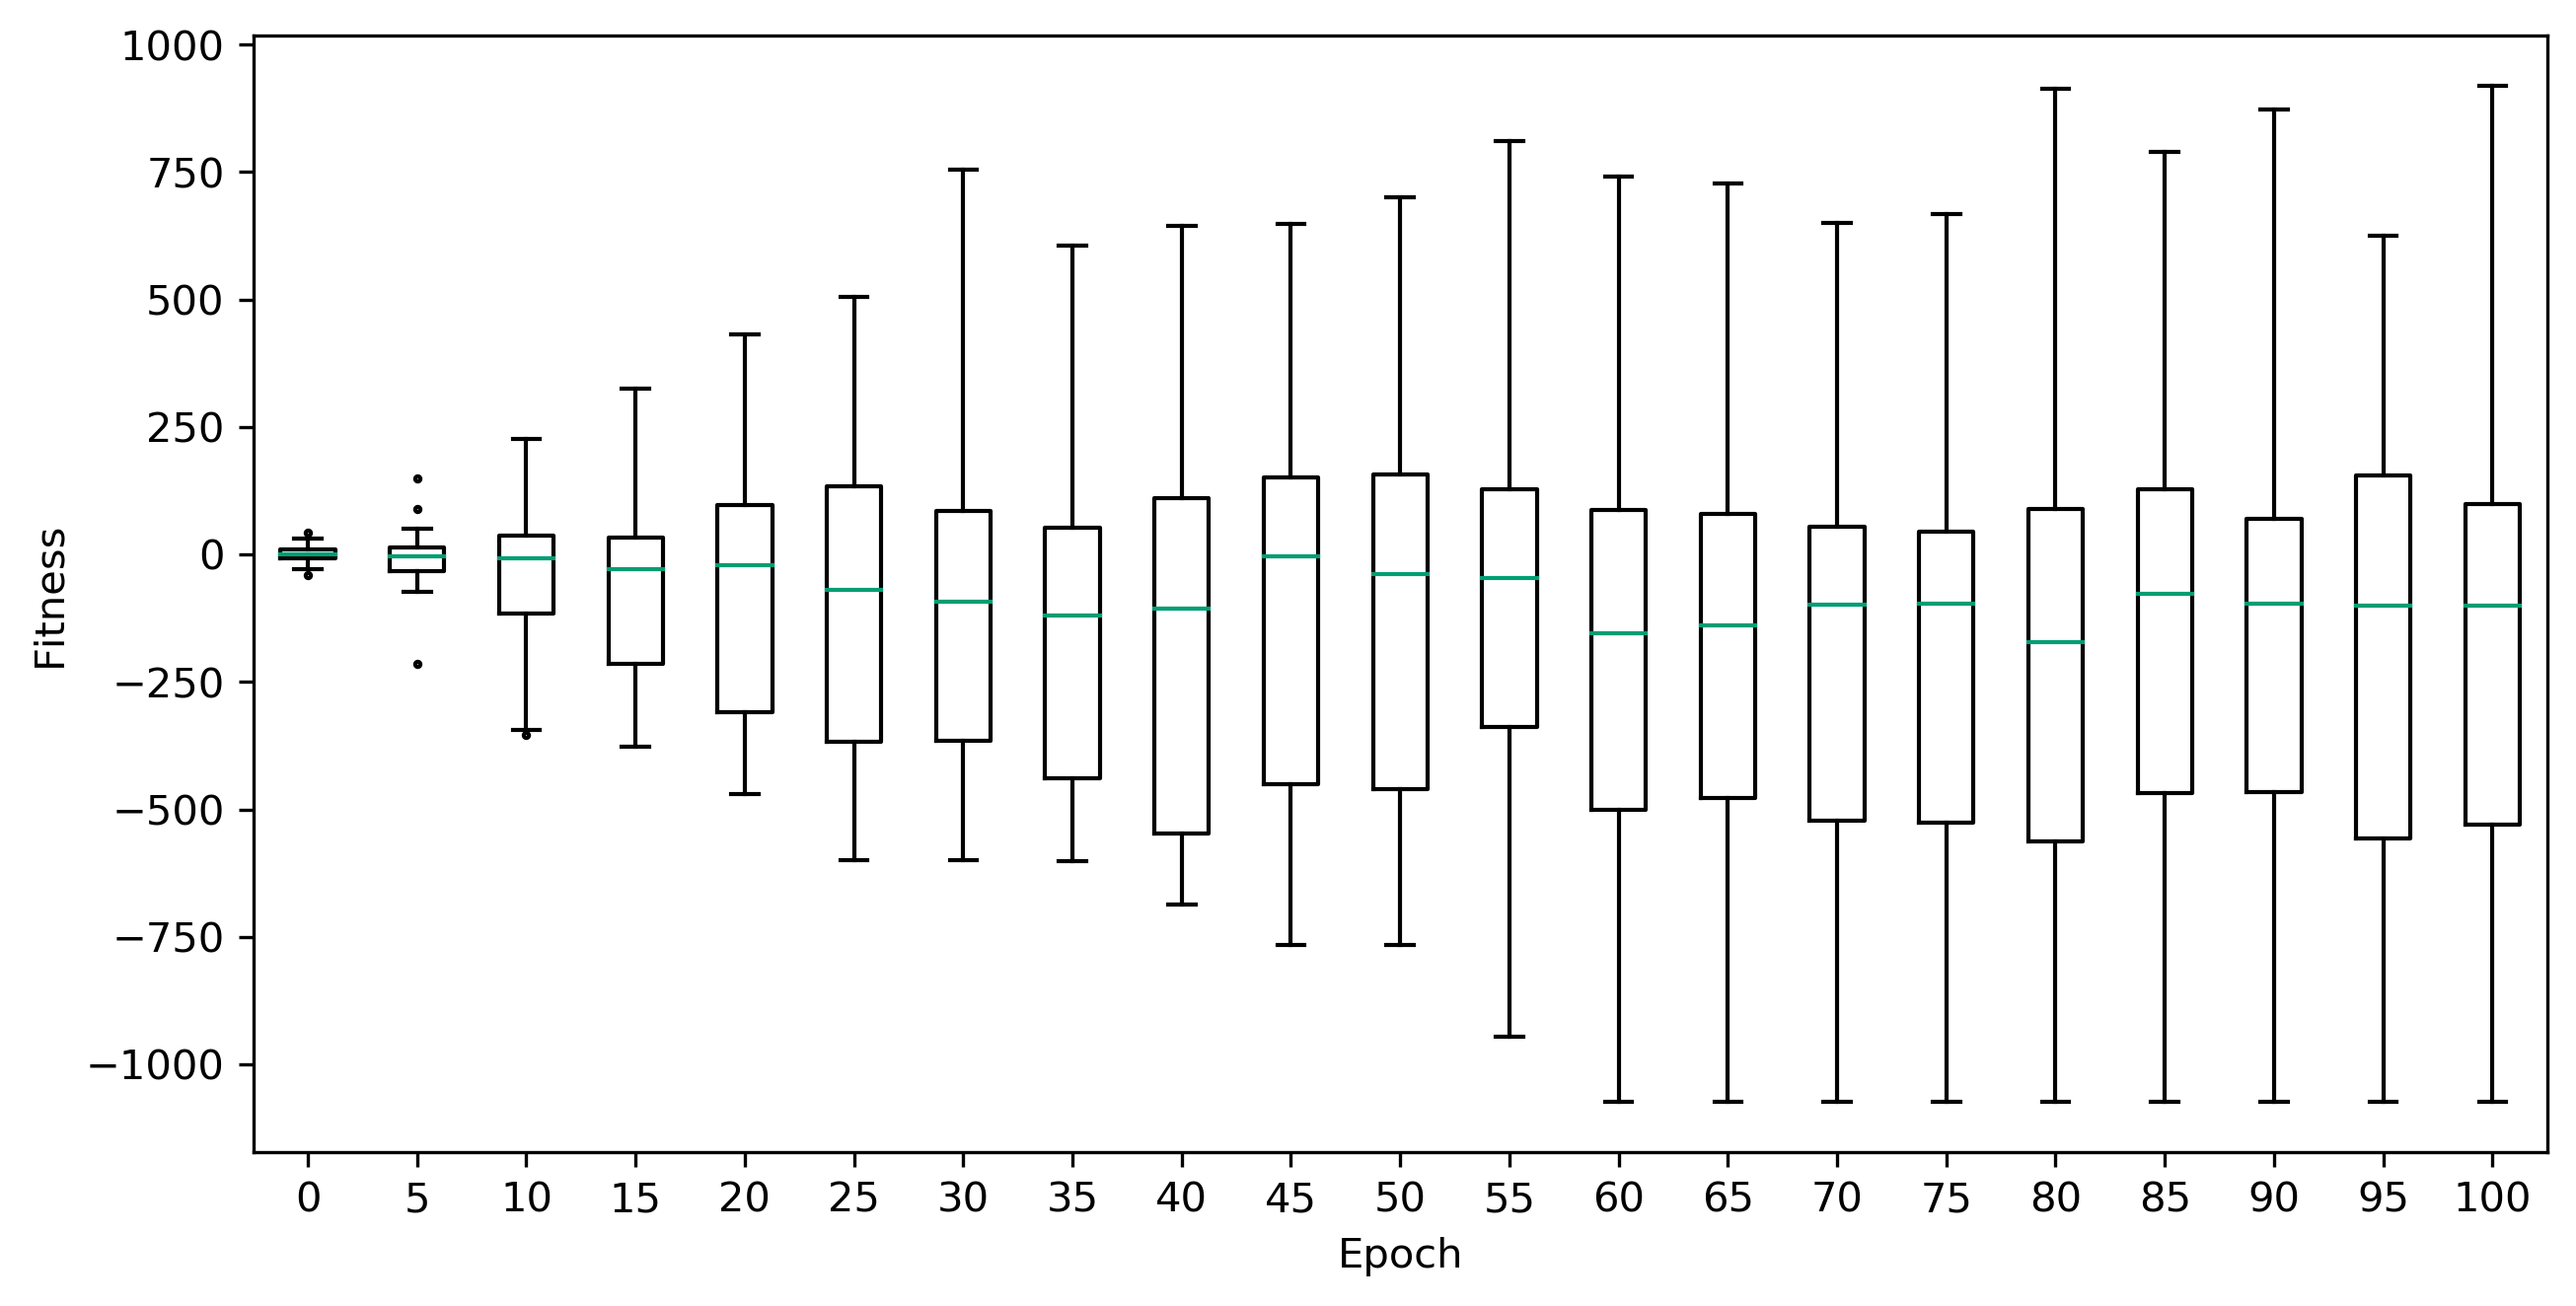

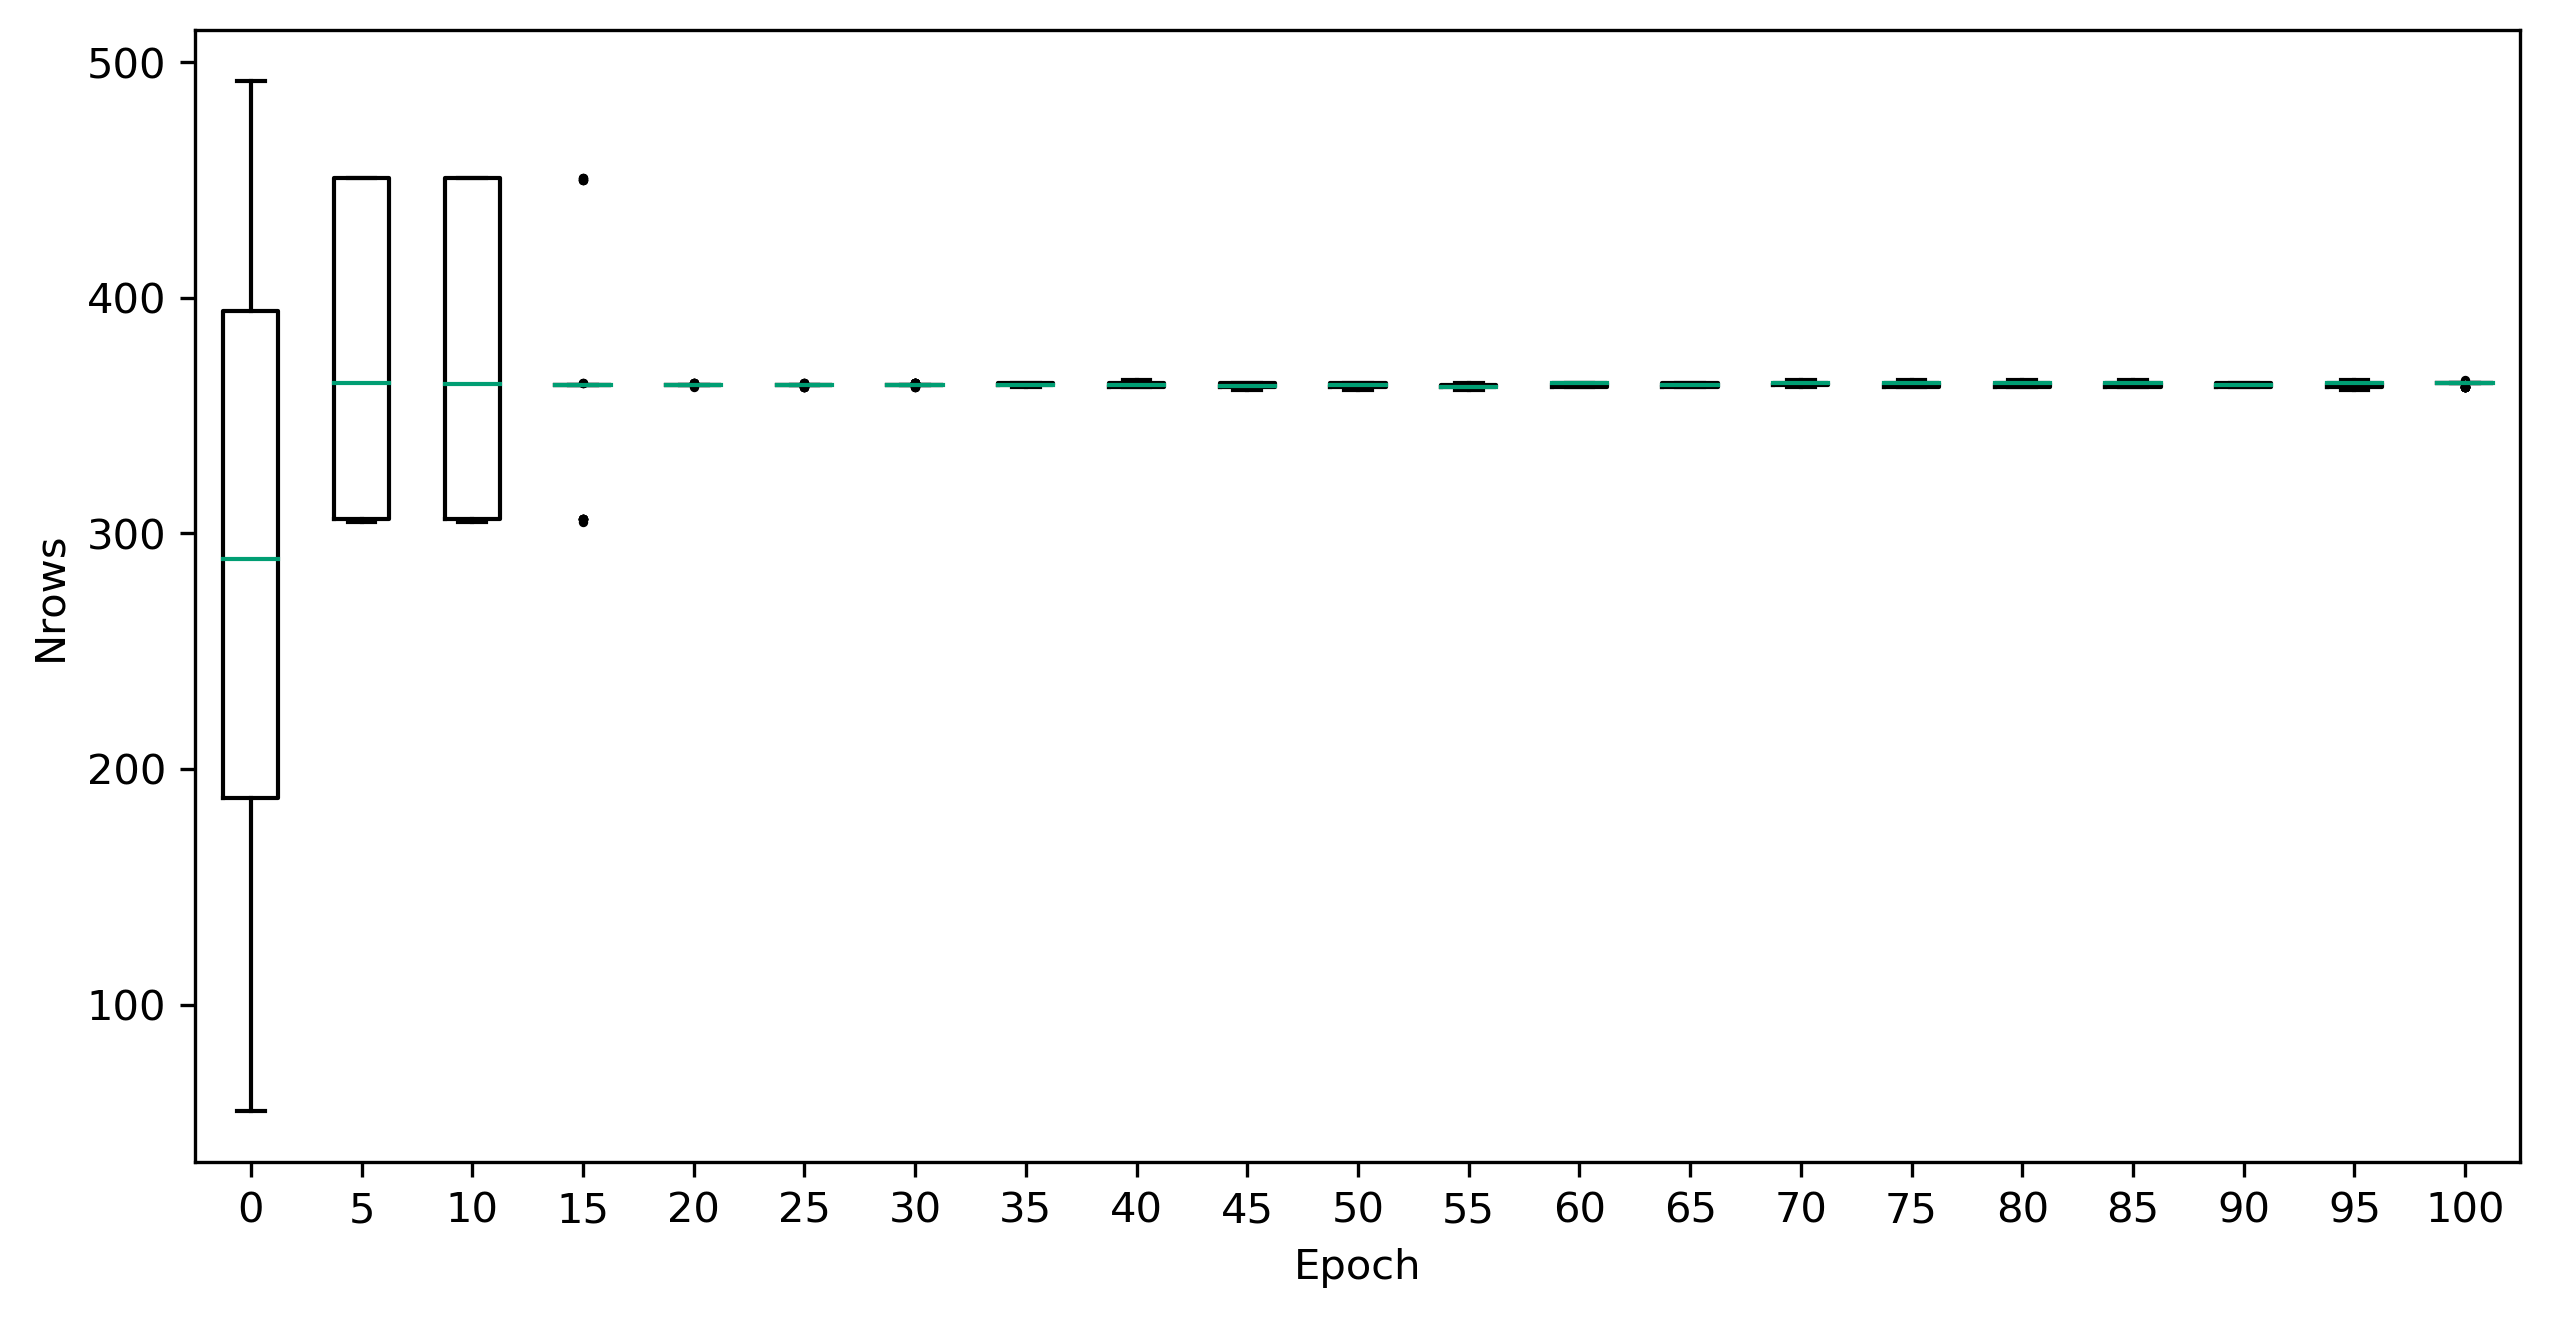

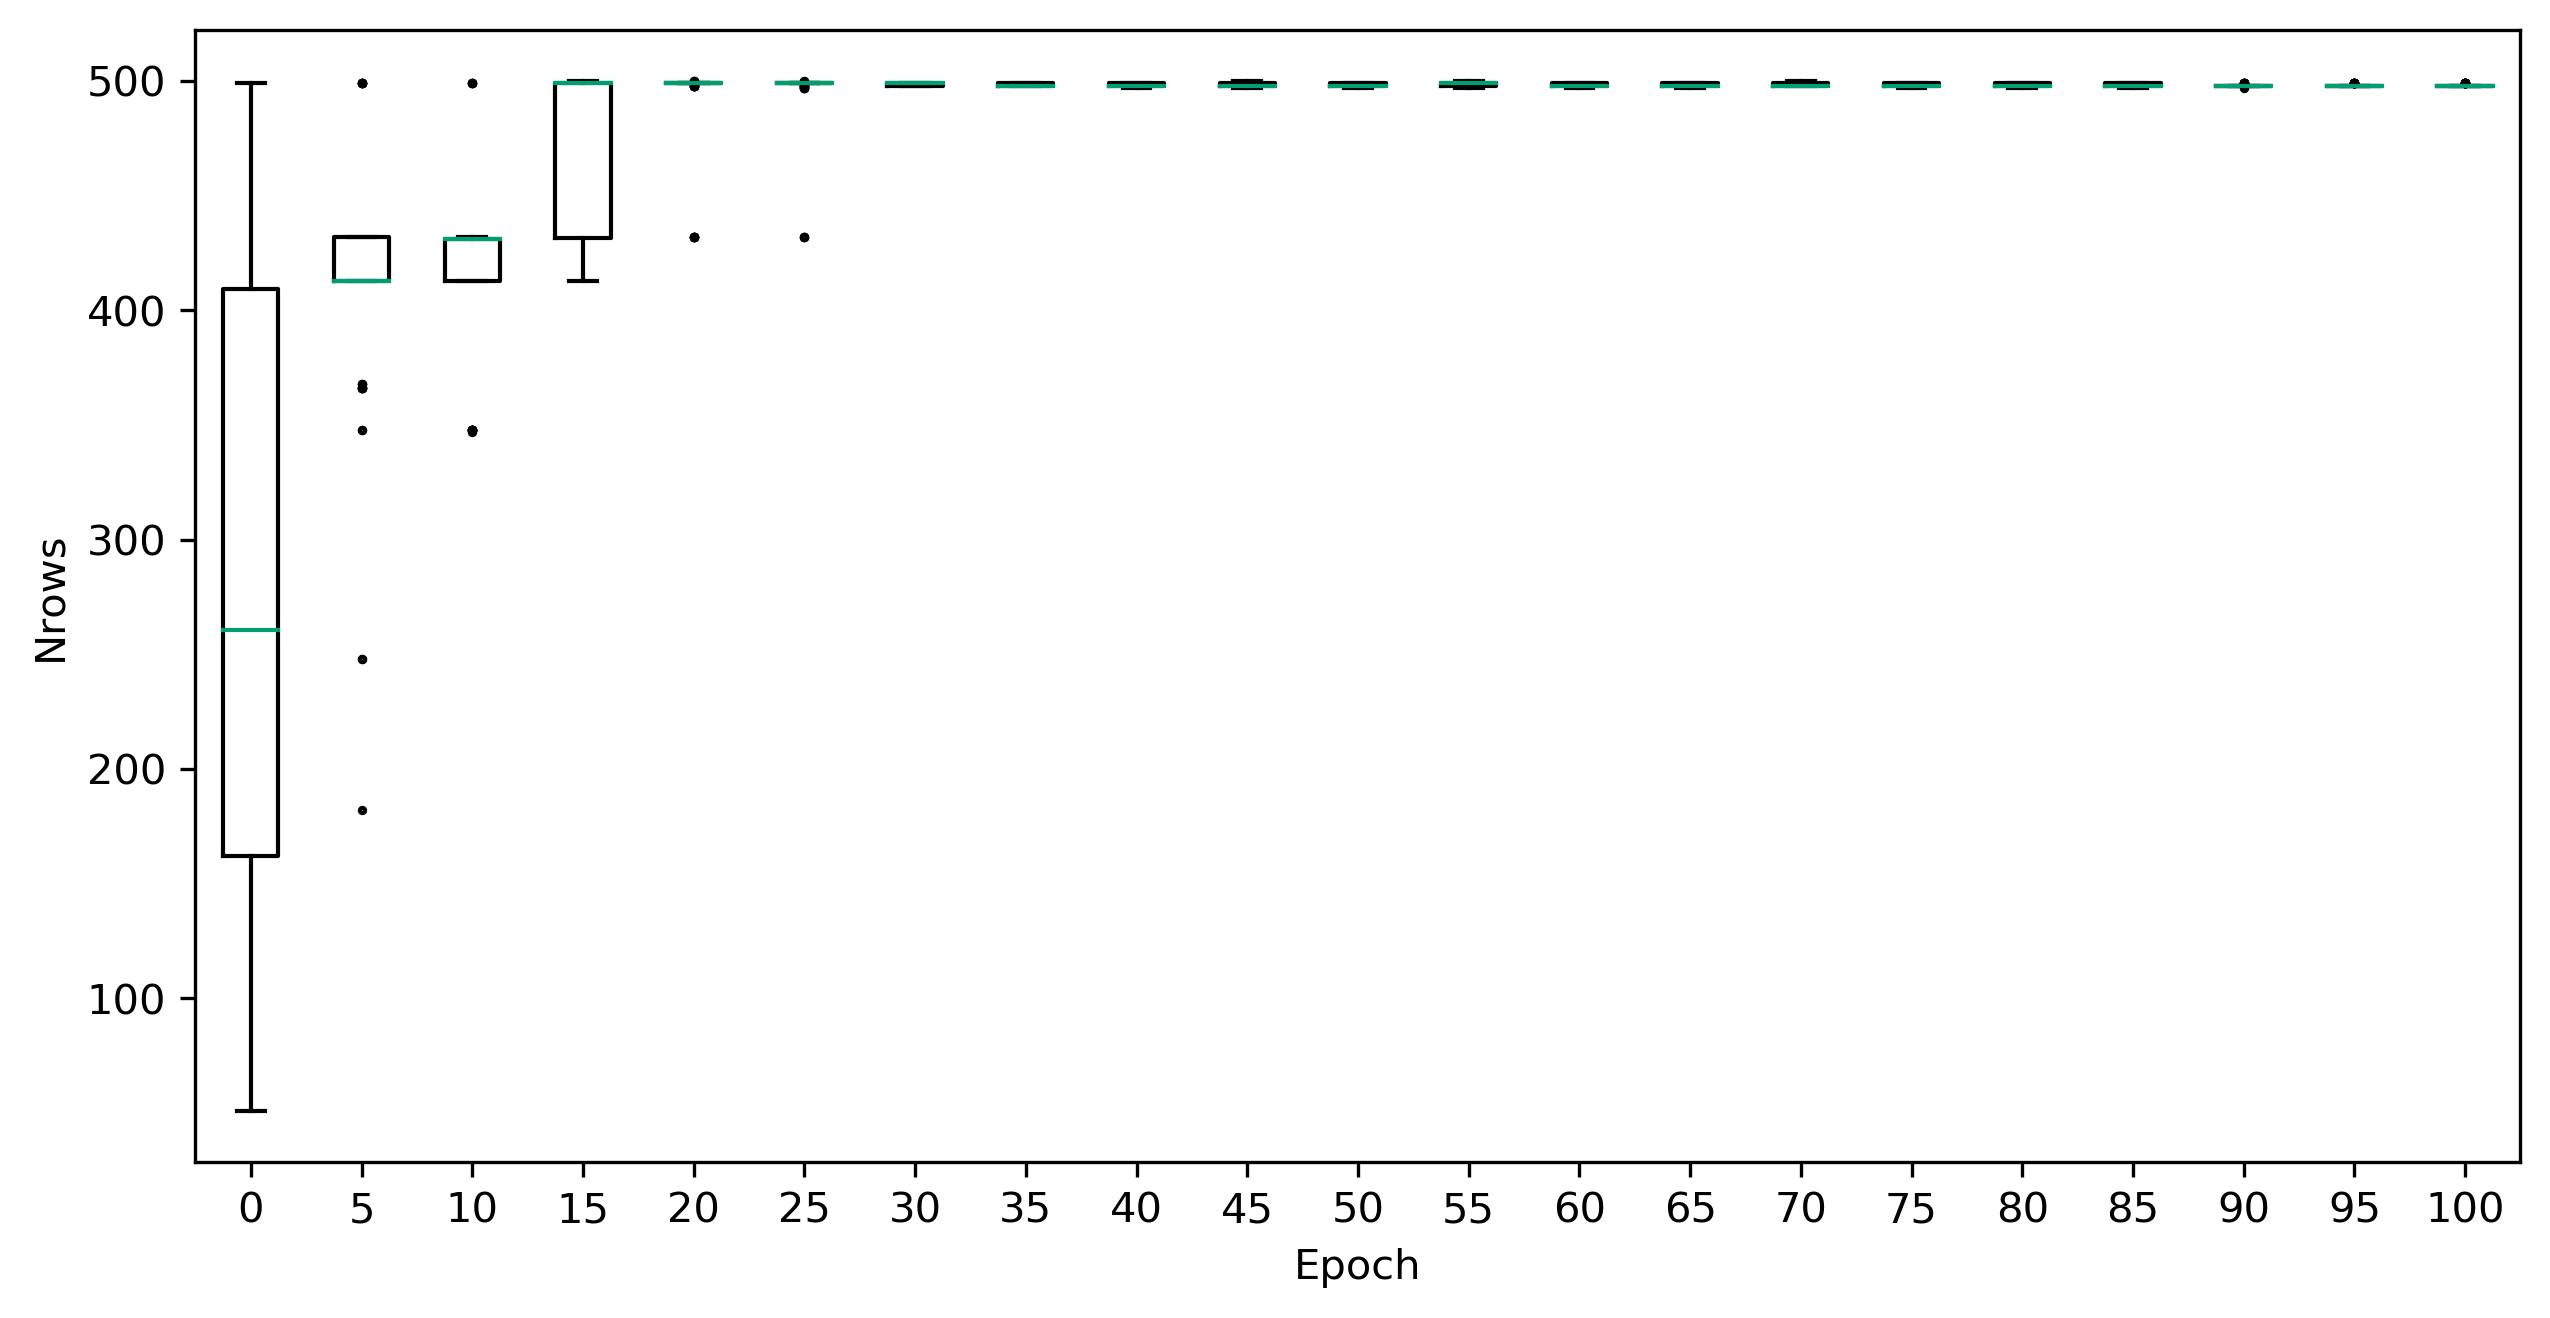

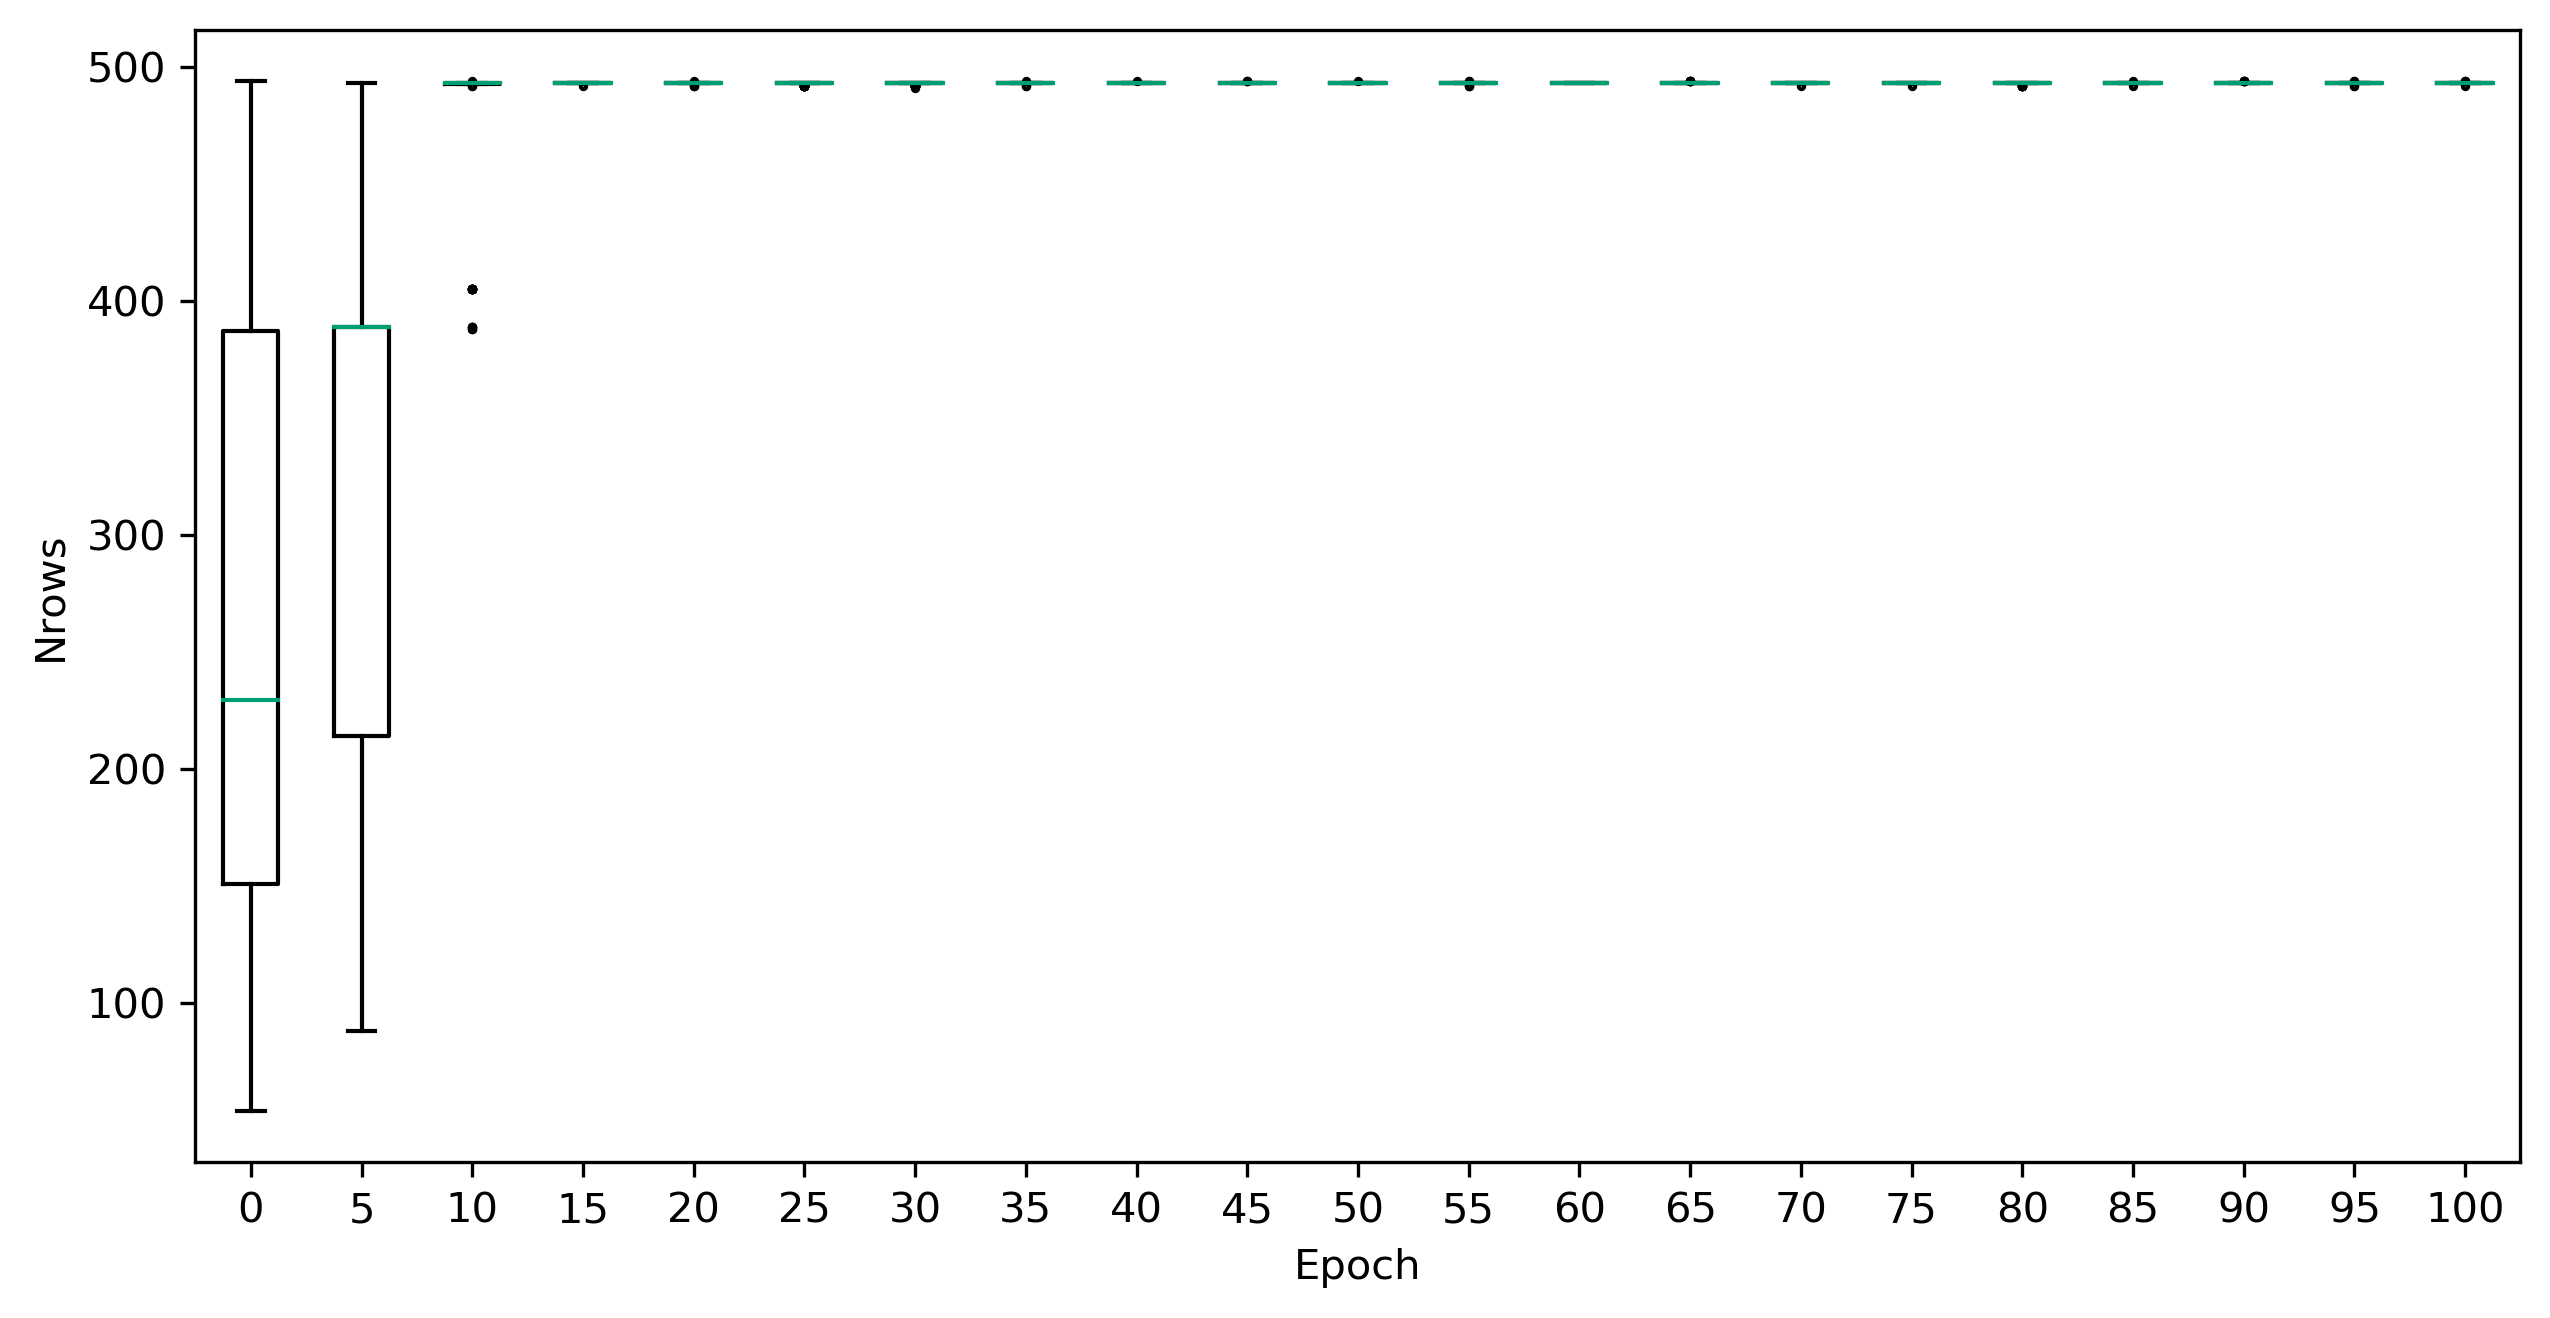

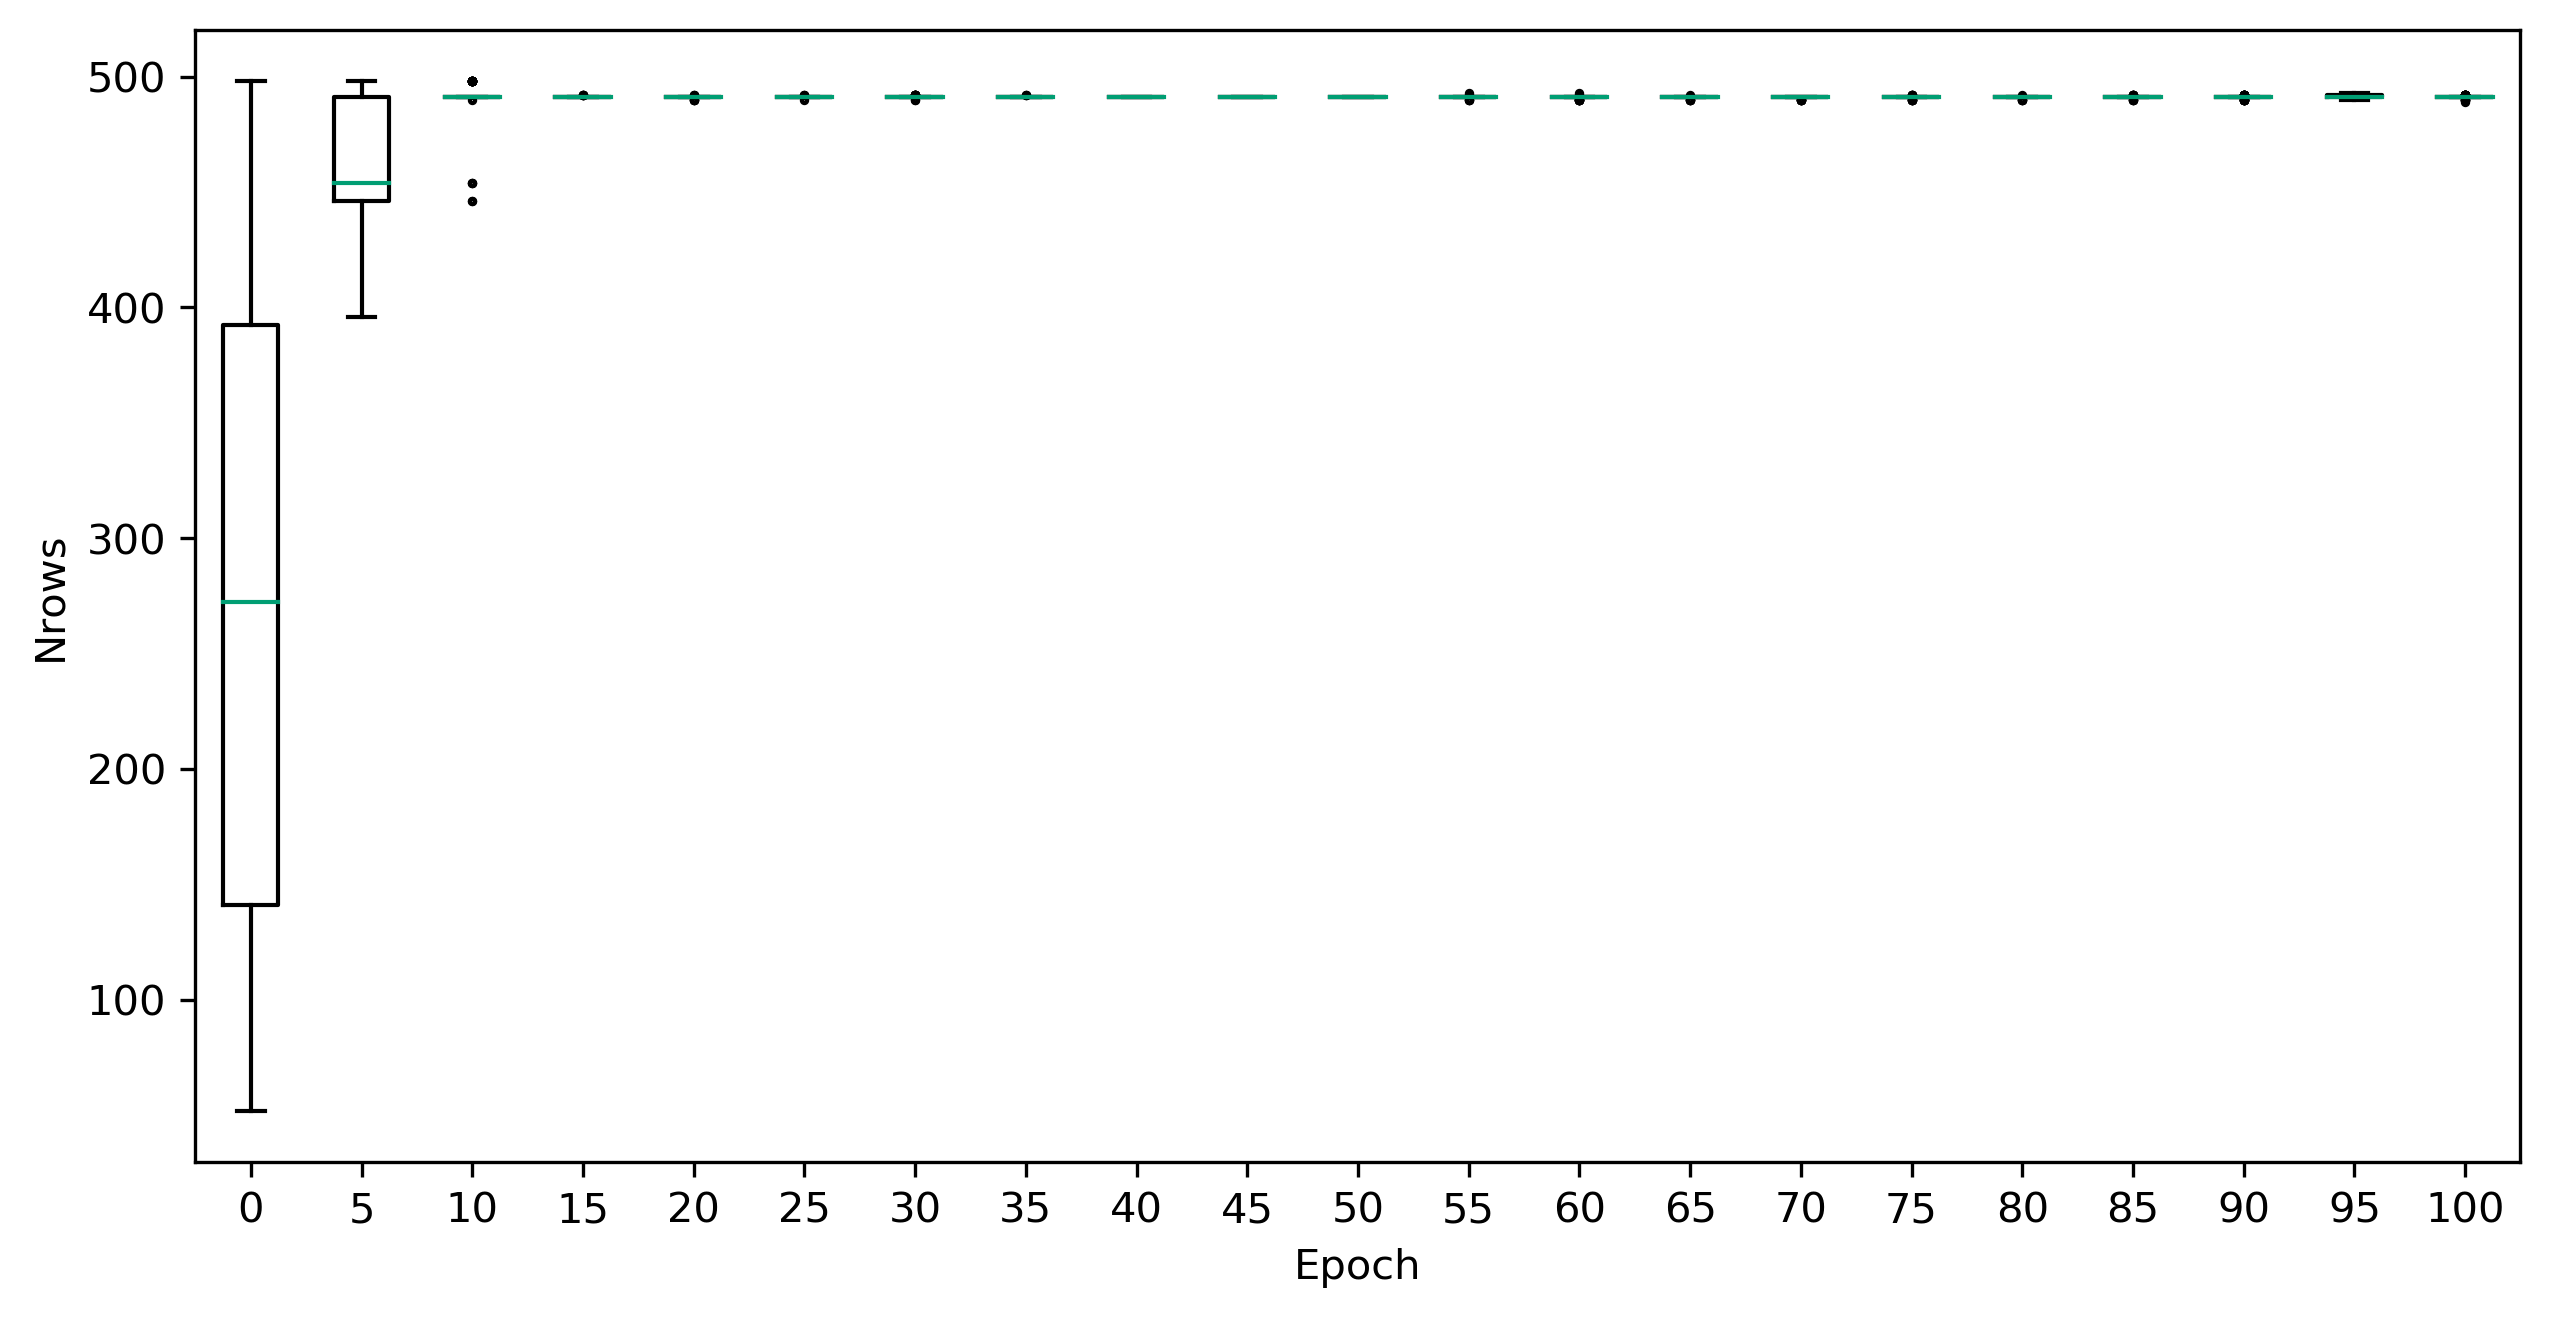

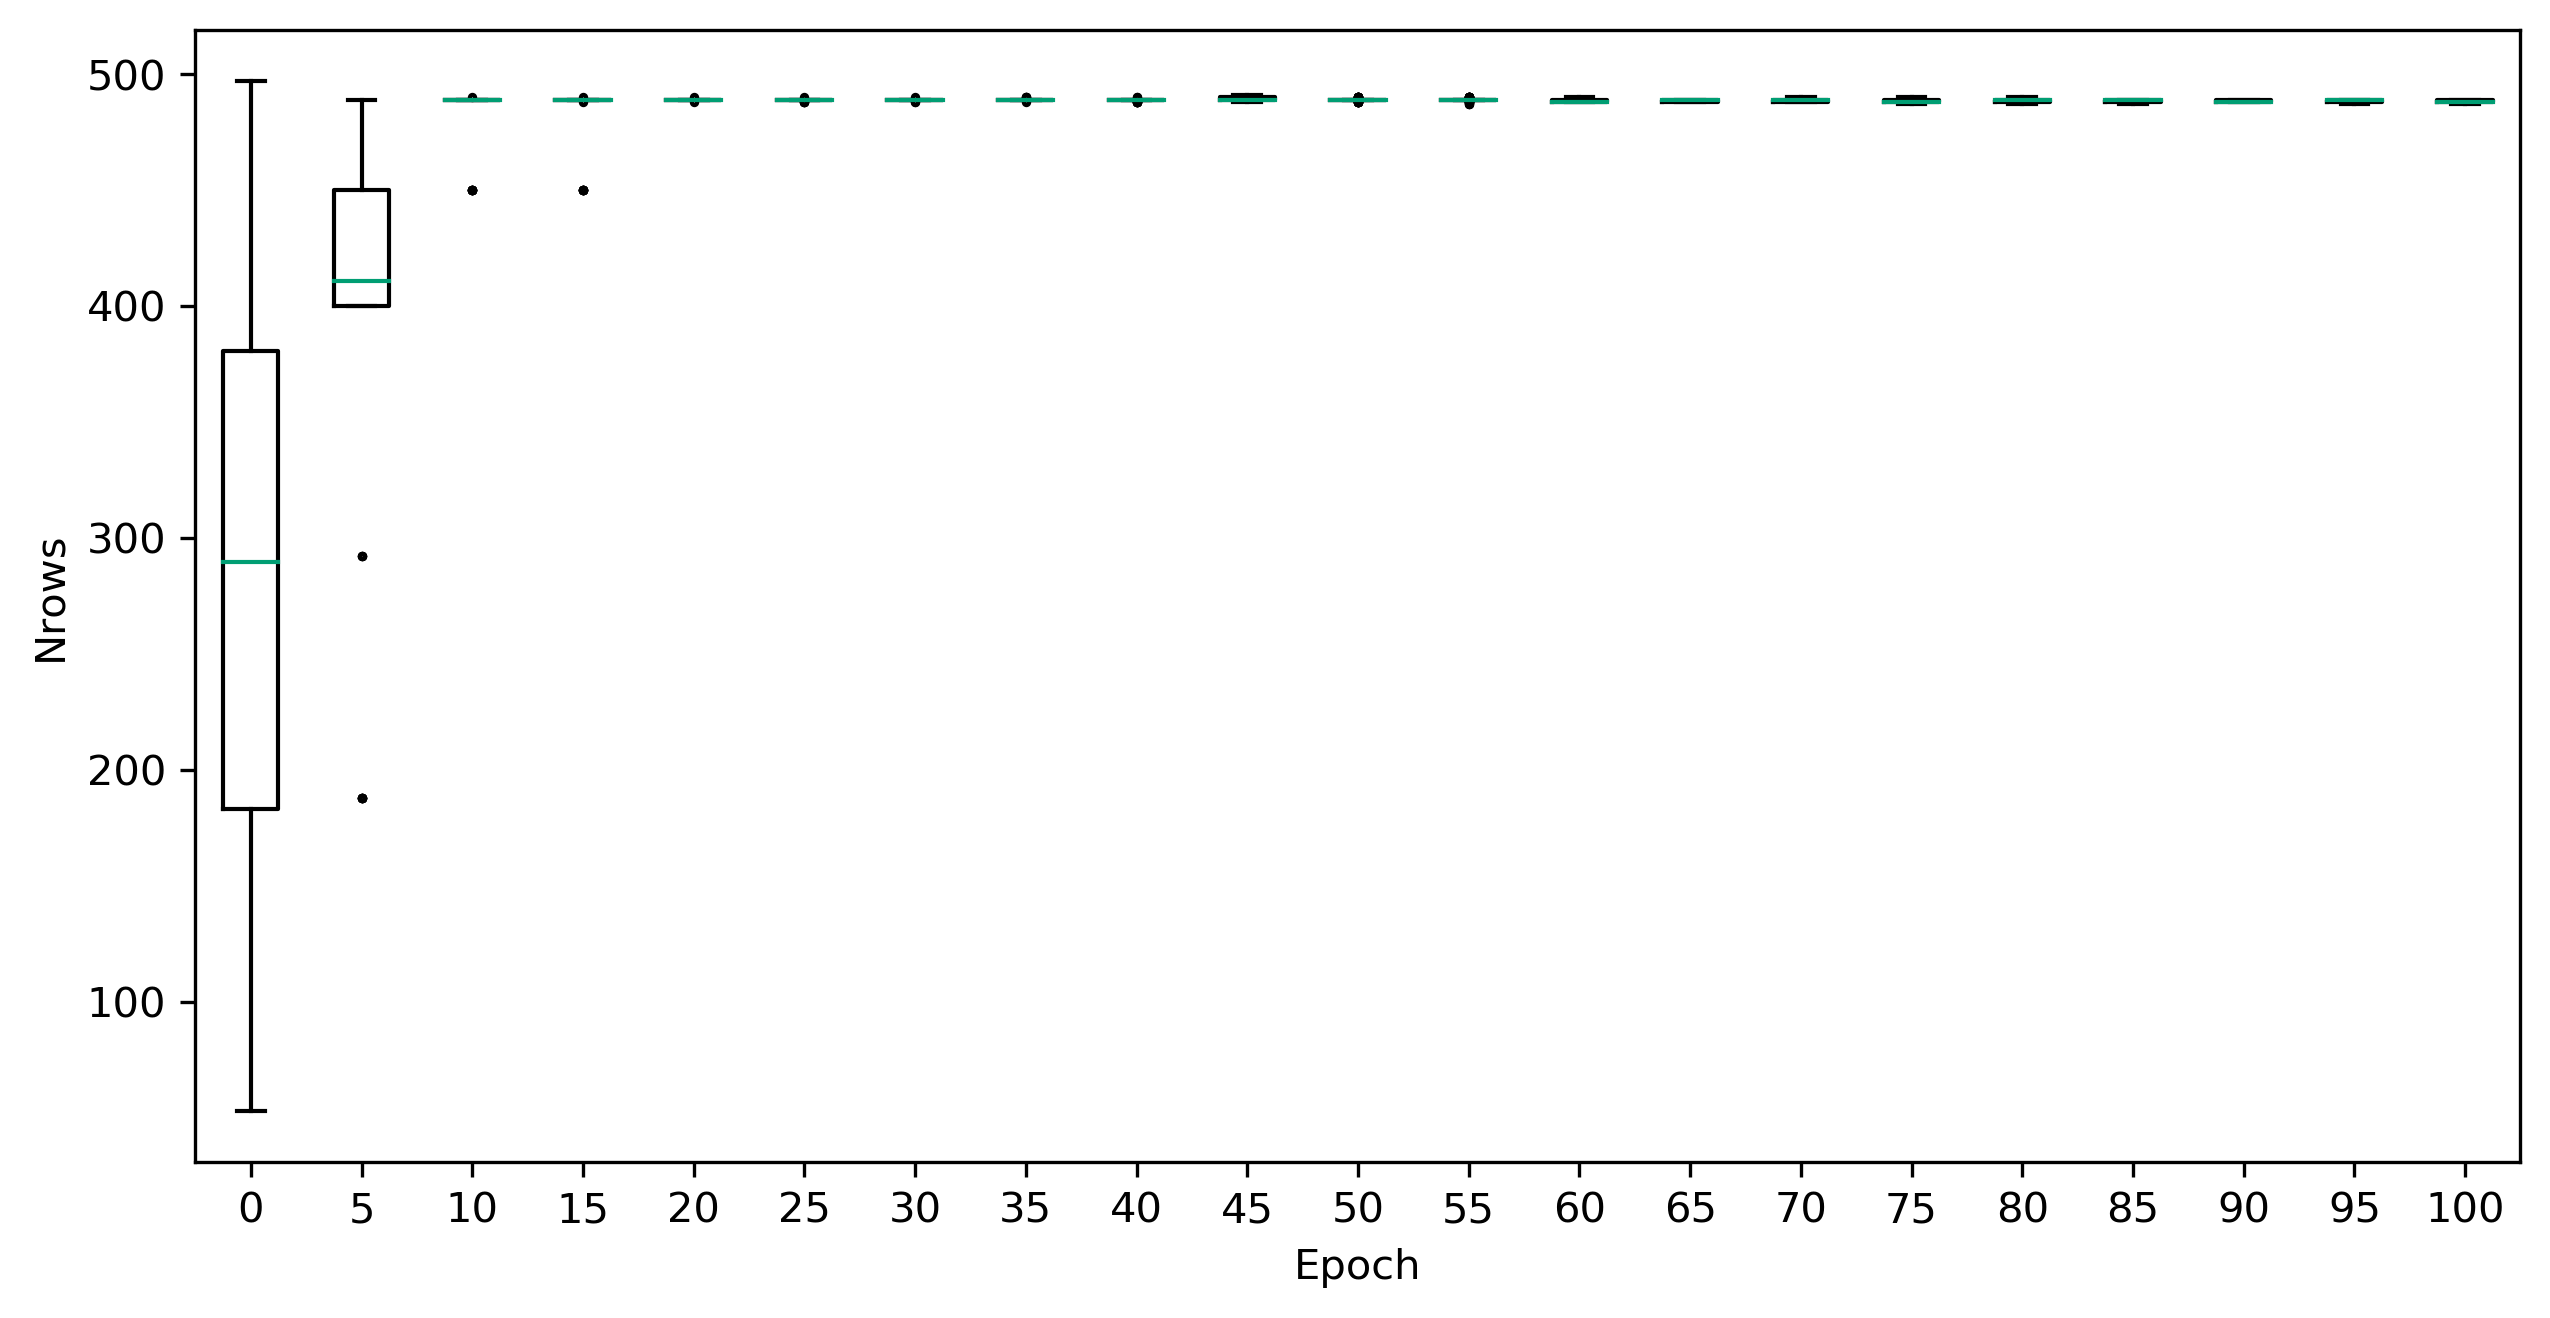

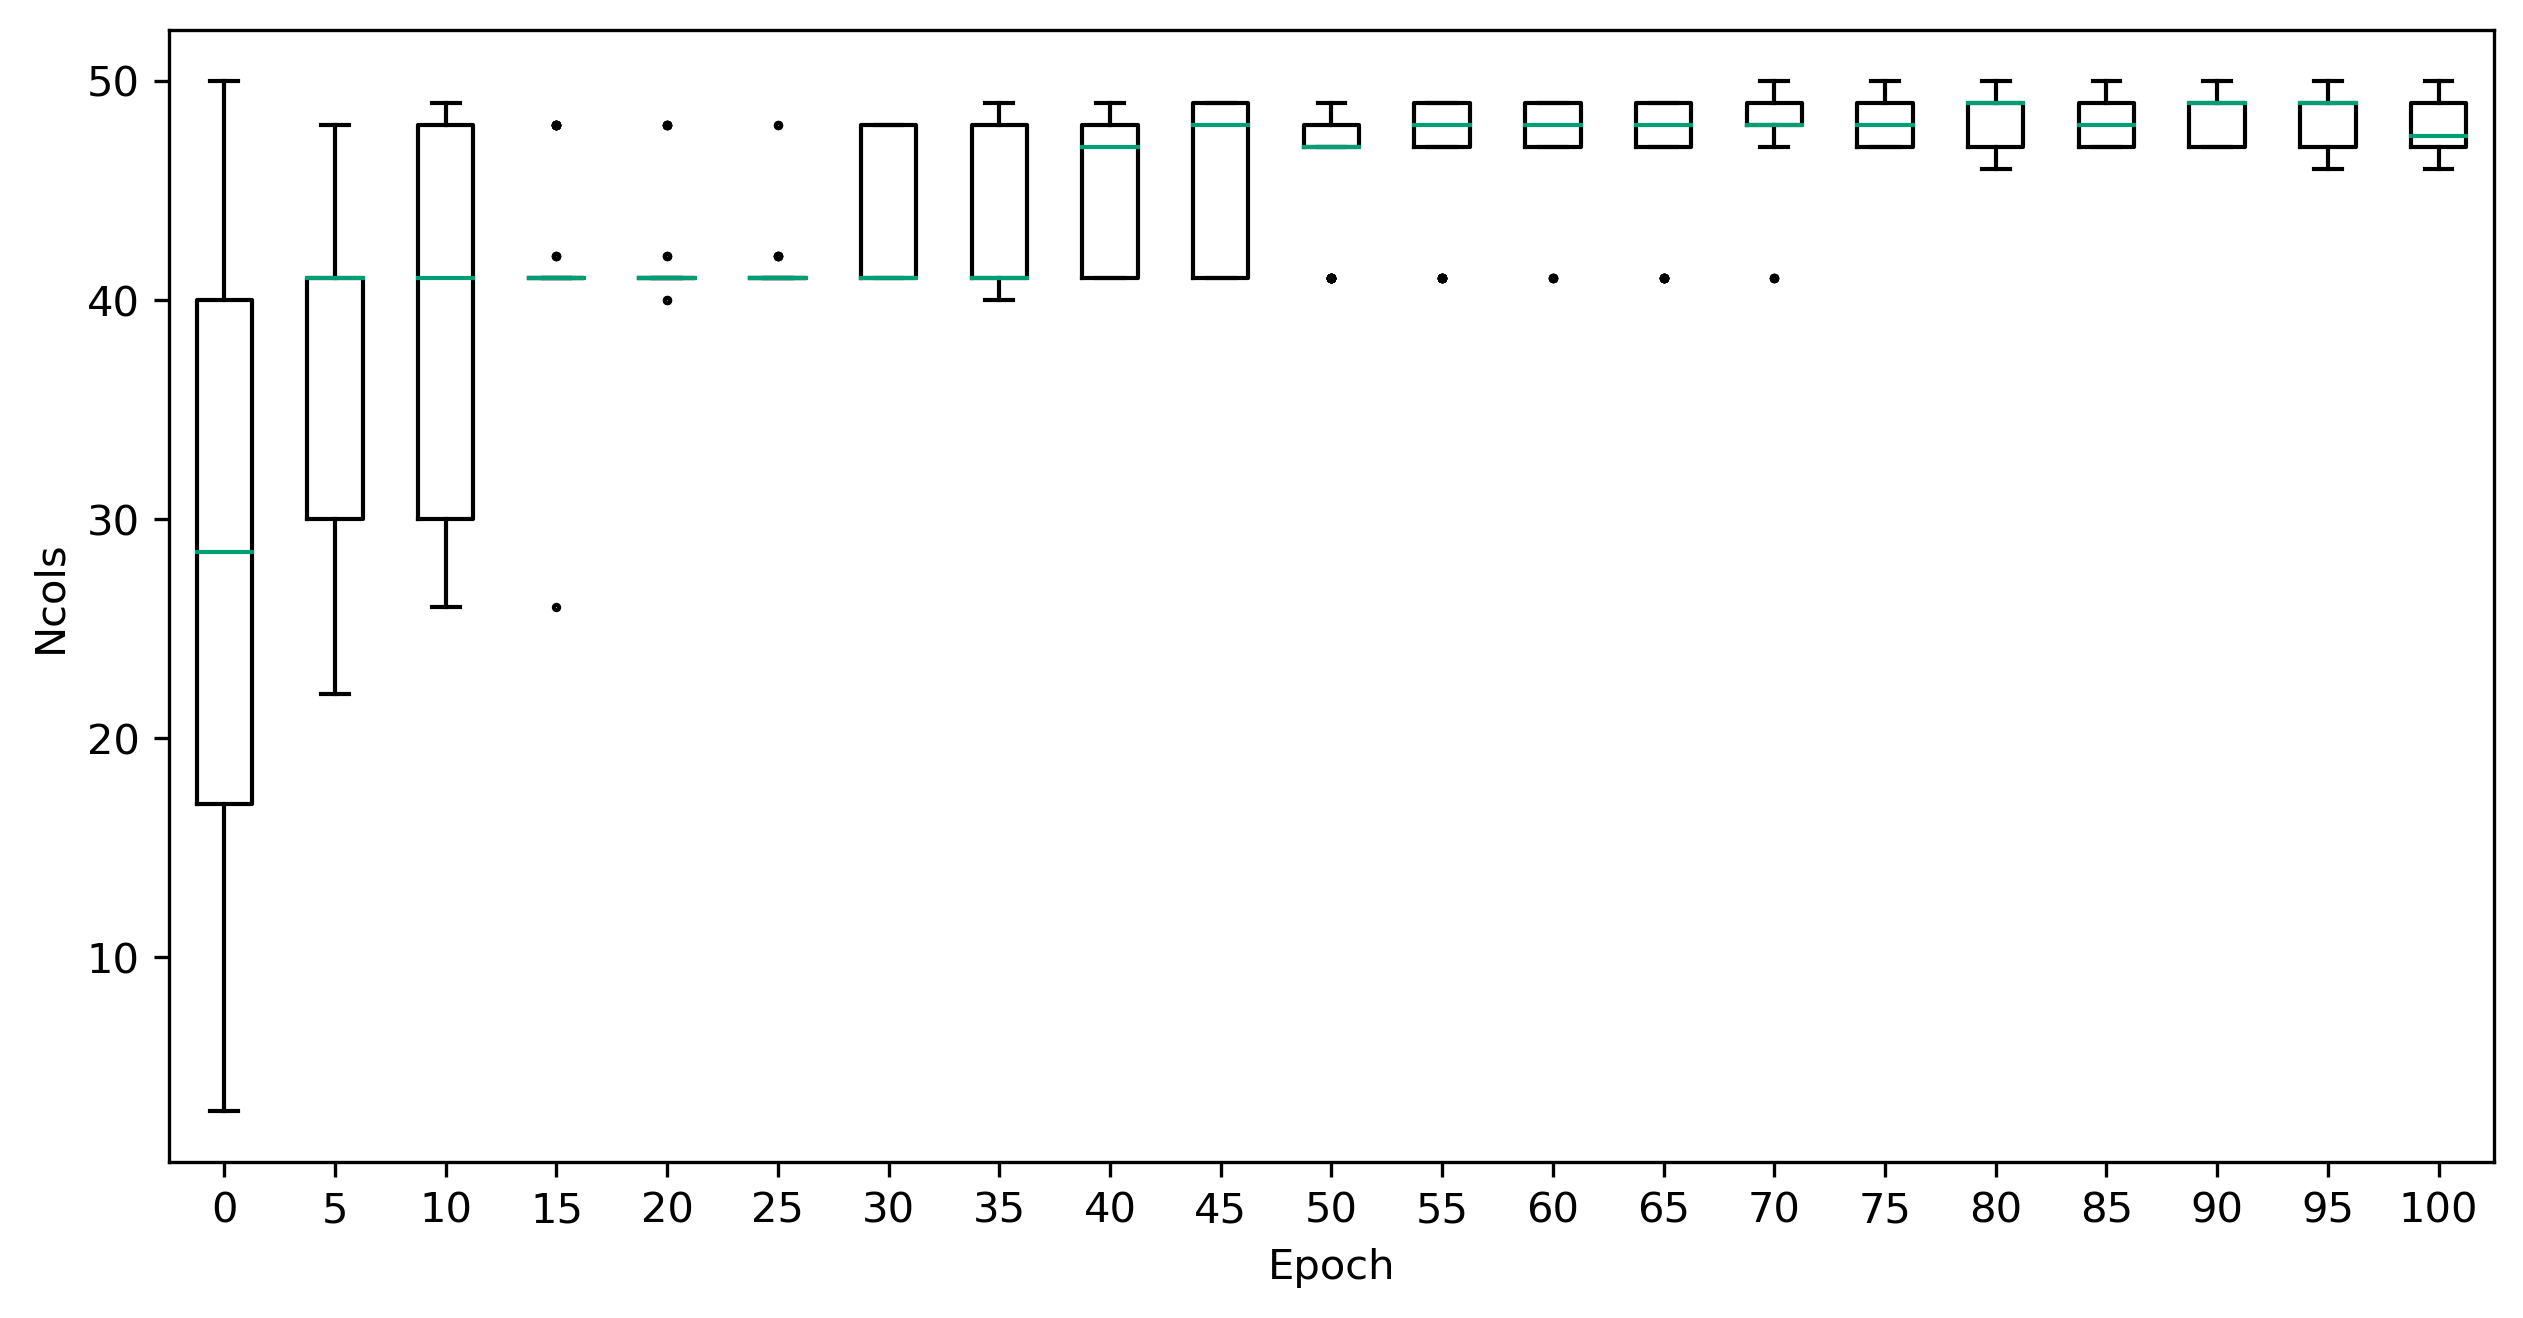

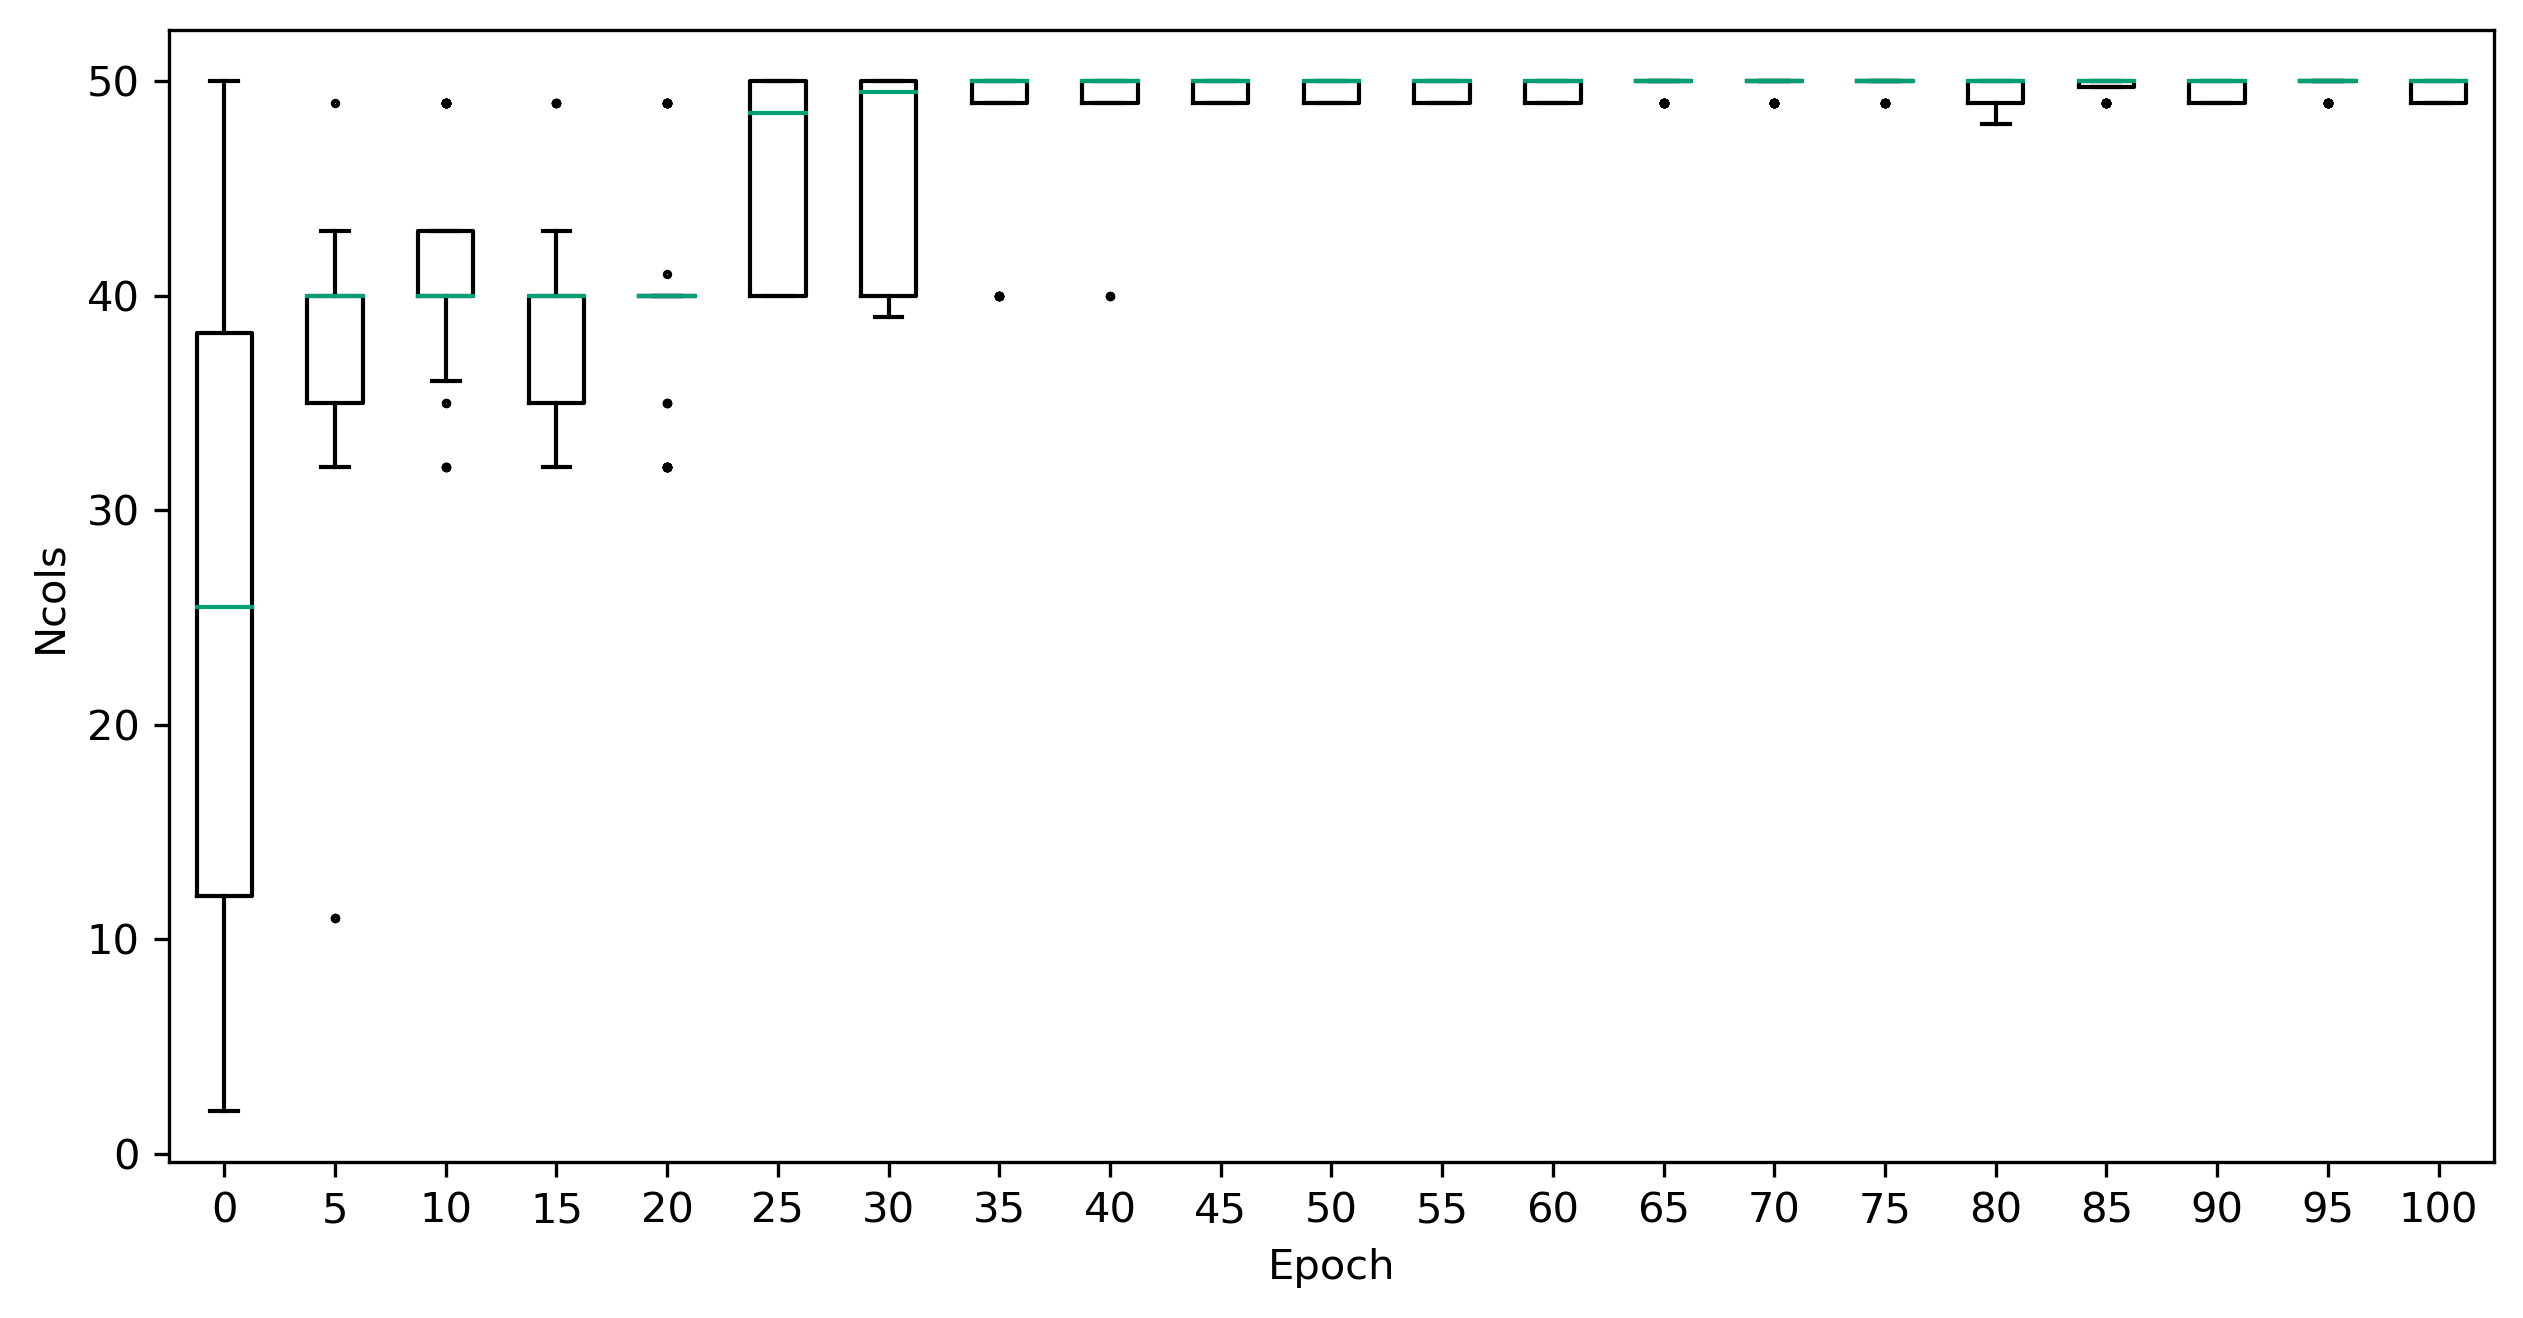

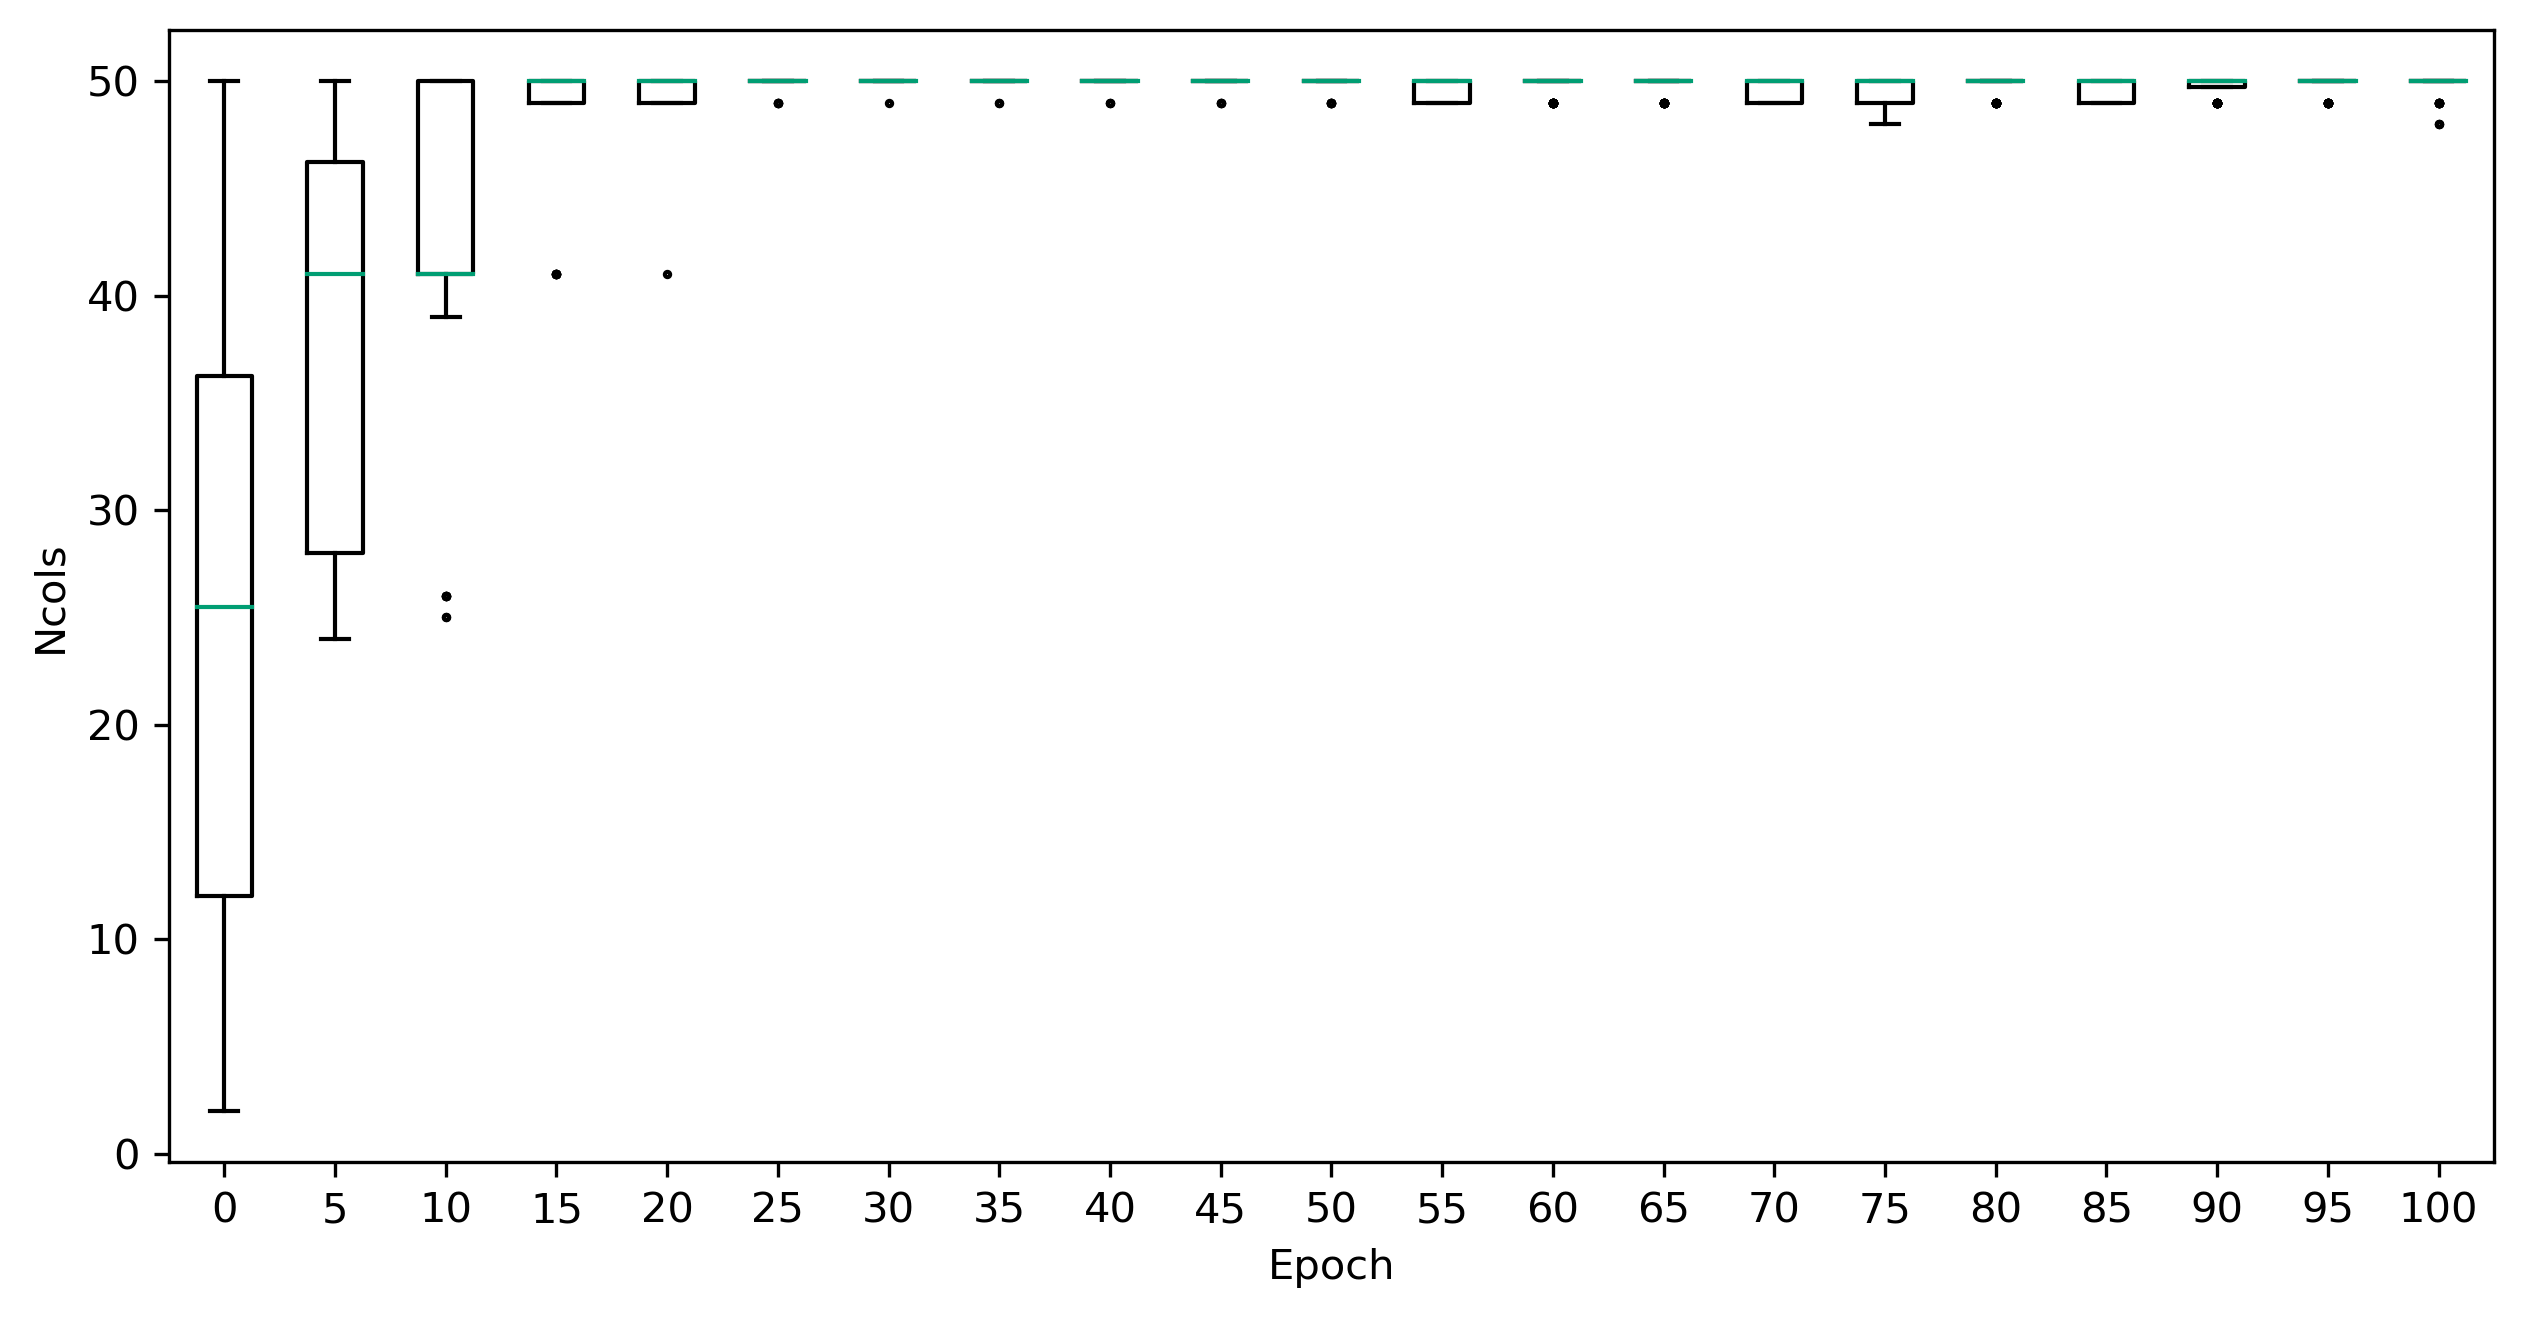

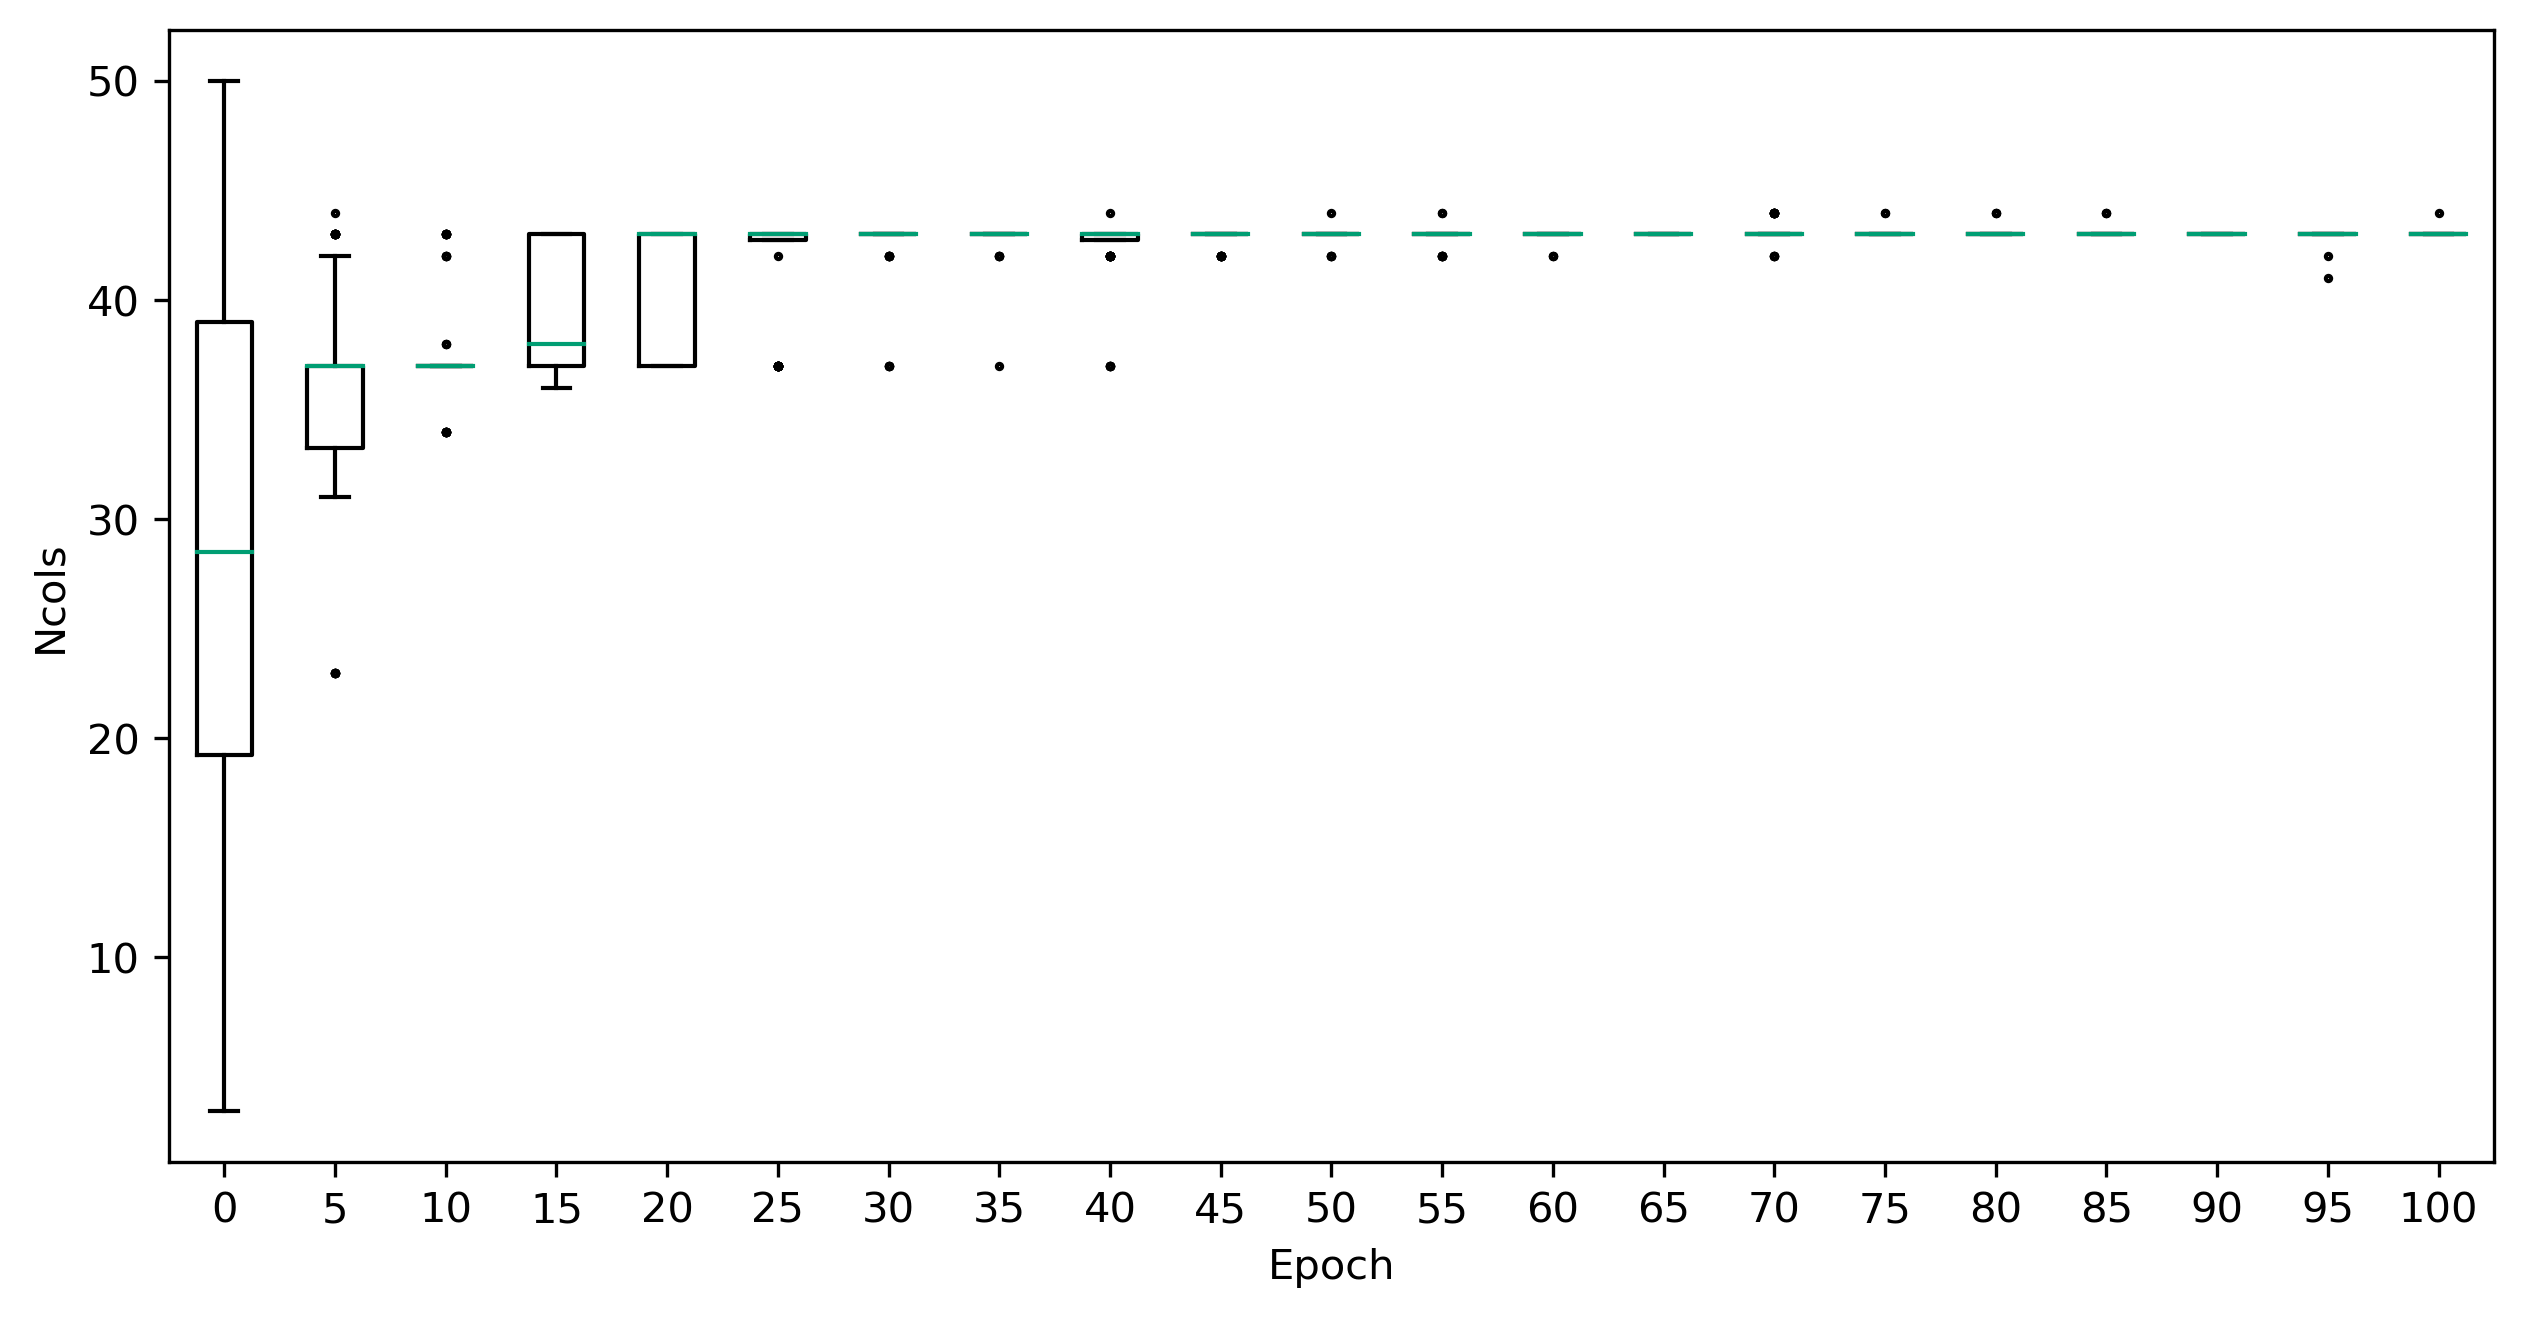

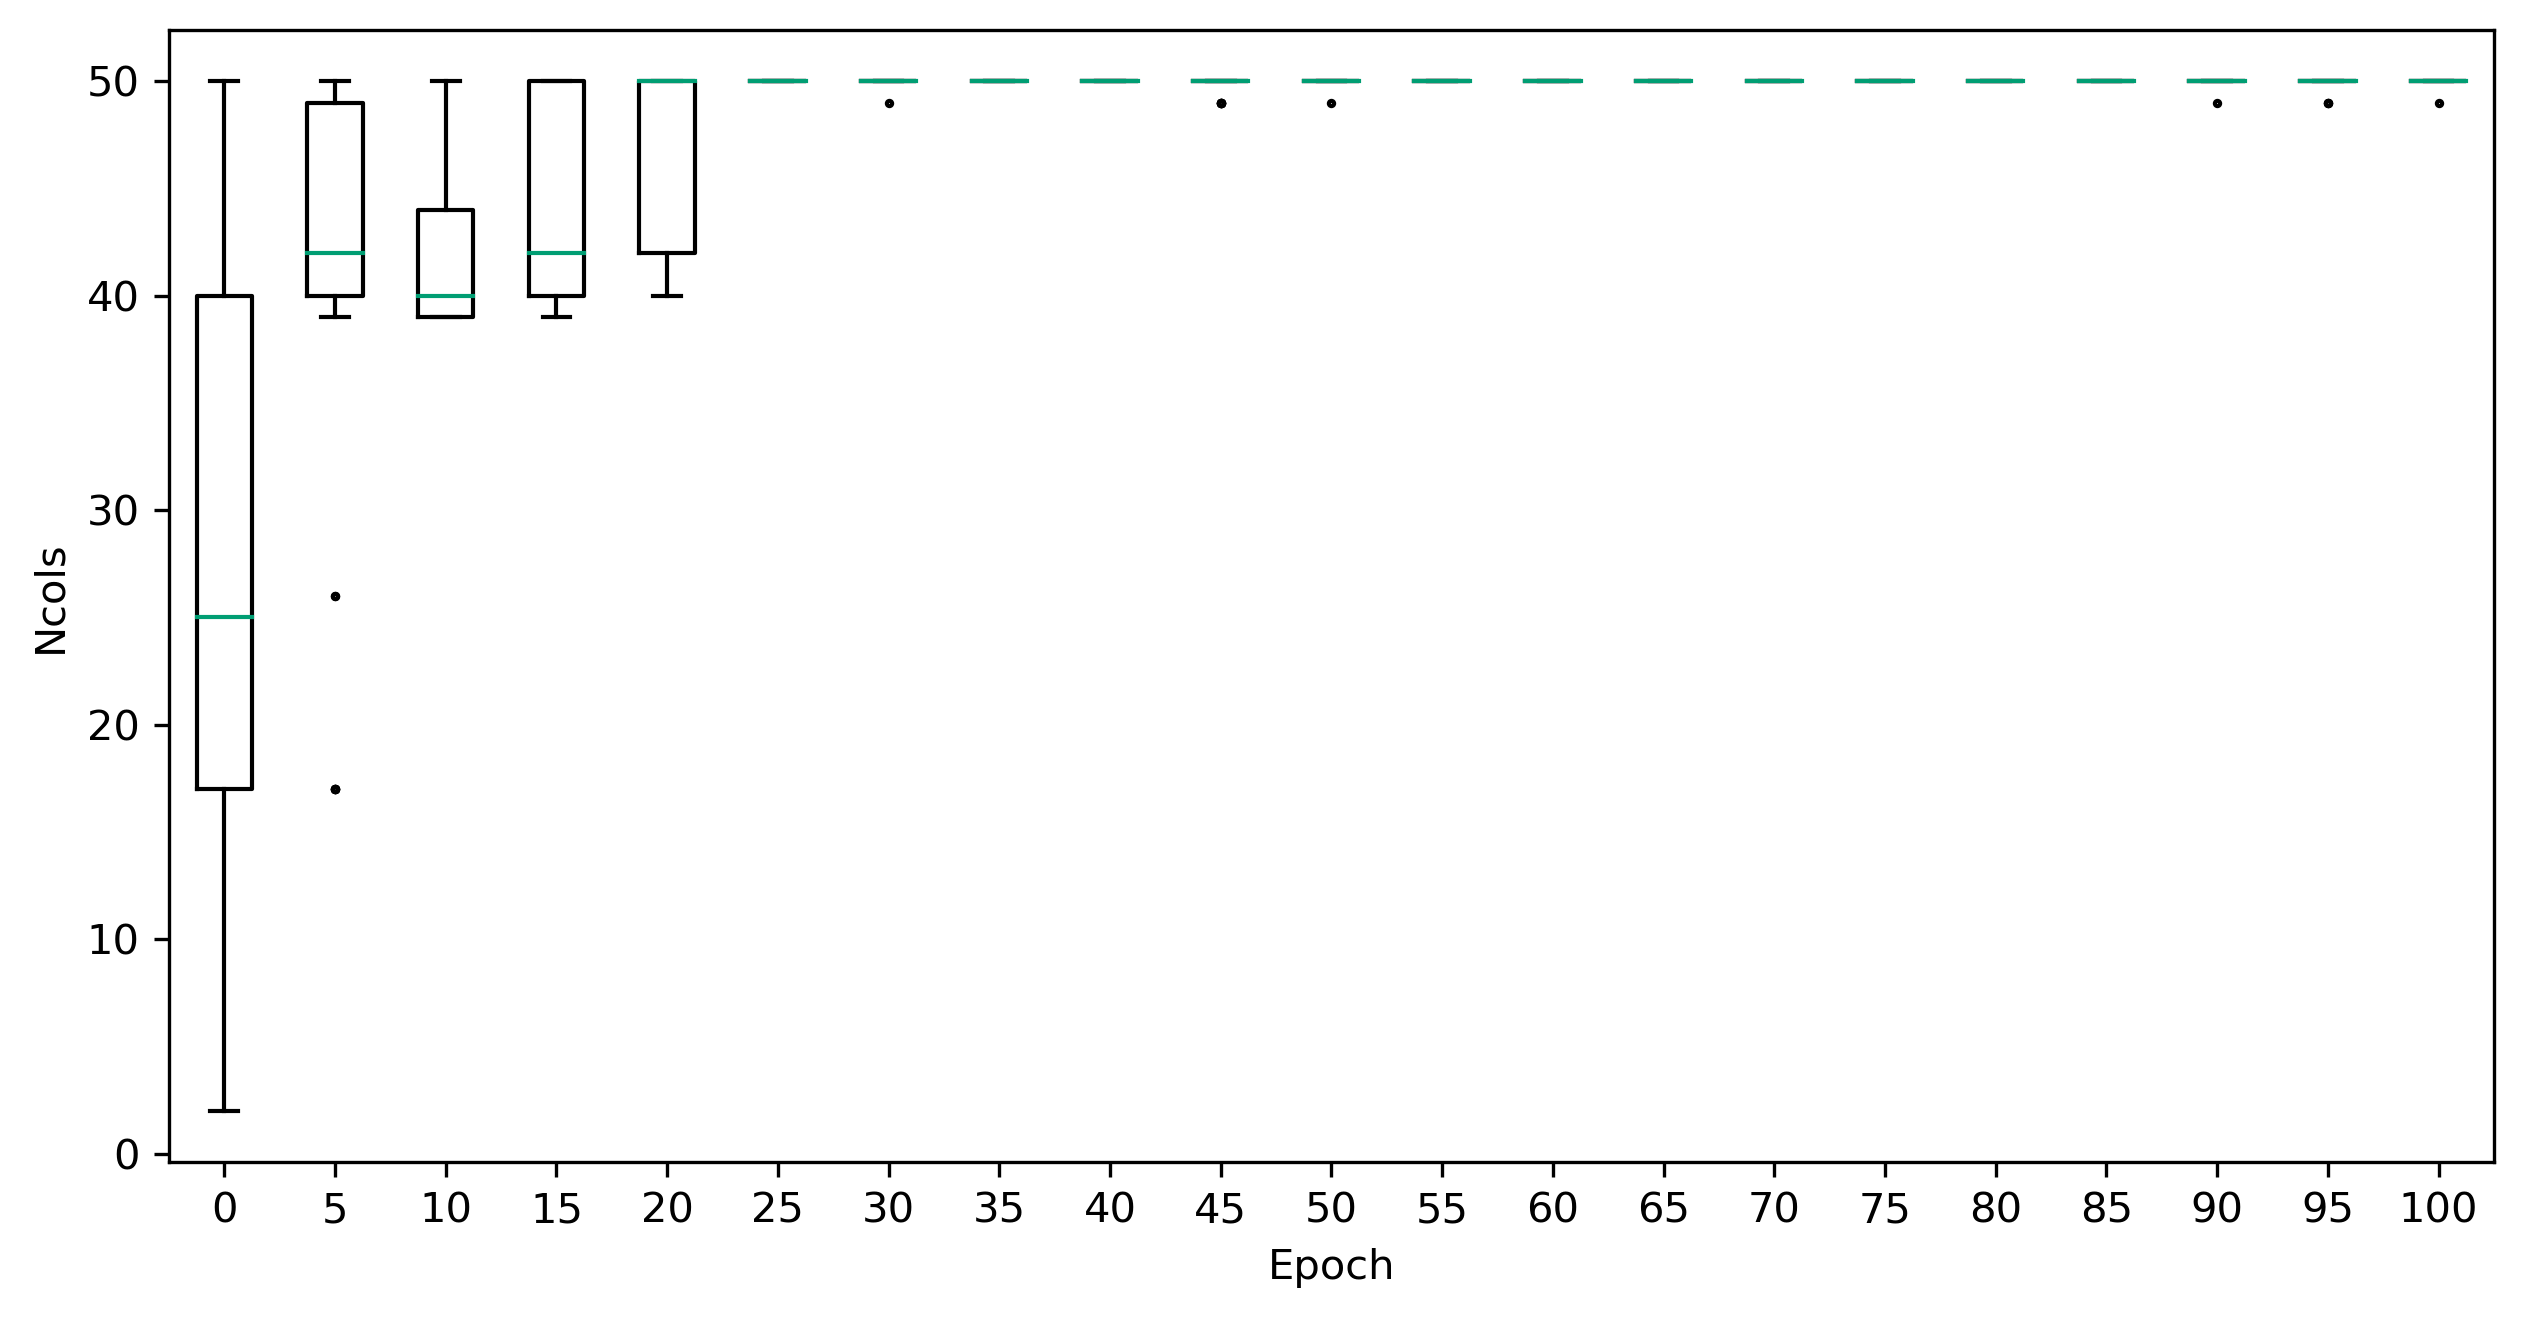

In [4]:
for column in ("fitness", "nrows", "ncols"):
    violinplots(main, column)

In [14]:
n_clusters = 3
max_iter = -1
for seed in range(5):
    print("RESULTS FOR SEED:", seed, "\n")
    for case in ("min", "median", "max"):
        case_path = f"{data_dir}{seed}/summary/{case}/"
        df = pd.read_csv(f"{case_path}main.csv", dtype=object)
        print(case)
#         print(df.describe())
#         print(df.apply(pd.Series.value_counts))
        print(
            "matching:",
            KModes(
                n_clusters, init="matching", max_iter=max_iter, n_init=25, random_state=seed
            ).fit(df).cost_,
            "\t huang:",
            KModes(
                n_clusters, init="huang", max_iter=max_iter, n_init=25, random_state=seed
            ).fit(df).cost_,
        )
        print("\n")

RESULTS FOR SEED: 0 

min
matching: 7550.0 	 huang: 7644.0


median
matching: 3575.0 	 huang: 3580.0


max
matching: 9277.0 	 huang: 8448.0


RESULTS FOR SEED: 1 

min
matching: 10321.0 	 huang: 10335.0


median
matching: 7871.0 	 huang: 7871.0


max
matching: 12152.0 	 huang: 10901.0


RESULTS FOR SEED: 2 

min
matching: 10058.0 	 huang: 10131.0


median
matching: 11177.0 	 huang: 11247.0


max
matching: 11117.0 	 huang: 9714.0


RESULTS FOR SEED: 3 

min
matching: 9101.0 	 huang: 9074.0


median
matching: 847.0 	 huang: 848.0


max
matching: 10593.0 	 huang: 9006.0


RESULTS FOR SEED: 4 

min
matching: 13645.0 	 huang: 13680.0


median
matching: 10733.0 	 huang: 10786.0


max
matching: 14590.0 	 huang: 13958.0




In [9]:
KModes?

## Huang over matching (initial cost)

In [ ]:
data_dir = "../data/edo/data/huang_over_matching_initial_cost/"

dfs = []
for seed in range(5):
    df = pd.read_csv(f"{data_dir}{seed}/summary/main.csv")
    df["seed"] = seed
    dfs.append(df)
    
main = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
def violinplots(main, column):

    num_gens, size, seeds = main[["generation", "individual", "seed"]].nunique()
    desired = range(0, num_gens, num_gens // 20)
    flierprops = dict(marker=".", markersize=2.5, linestyle="none")

    for seed, data in main.groupby("seed")[column]:
        fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

        data = data.values.reshape((num_gens, size))
        ax.boxplot(data[desired].T, flierprops=flierprops)

        ax.set_xticklabels(desired)
        ax.set_xlabel("Epoch")
        ax.set_ylabel(column.capitalize())

In [ ]:
for column in ("fitness", "nrows", "ncols"):
    violinplots(main, column)

In [ ]:
for seed in range(seeds):
    print("RESULTS FOR SEED:", seed, "\n")
    for case in ("min", "median", "max"):
        df = pd.read_csv(f"{data_dir}{seed}/summary/{case}/main.csv", dtype=object)
        print(case, "\n", df.describe(), "\n")
    print("\n\n")